## Исследование данных о российском кинопрокате за 2010-2019гг



В современной среде кинематограф - это не только искусство, несущее и формирующее культуру, но и инструмент влияния на общество. Фильмы несут в себе ценности, установки и идеологию, которые затем проникают в сознание зрителей. Таким образом, кинематограф как часть медиапространства является важной отраслью народного хозяйства и привлекает внимание государства как рычаг воздействия на развитие общества.

В нашем распоряжении данные открытого портала Министерства культуры и сайта КиноПоиск, отражающие информацию о прокатных удостоверениях, сборах и государственной поддержке кинолент, выходящих в российский прокат в период с 2010 по 2019 годы. В ходе исследования следует изучить рынок российского кинопроката и определить текущие тренды.

### Первичная обработка файлов с данными и объединение их в один датафрейм. 

In [1]:
# Импортируем необходимые для работы библиотеки:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

# Сделаем графики более чёткими и читаемыми:
%config InlineBackend.figure_format = 'retina'

# Отобразим все столбцы таблиц:
pd.set_option('display.max_columns', None)

In [2]:
# Откроем первый файл с информацией о прокатных удостоверениях и параметрах фильмов:
movies = pd.read_csv('.csv')
display(movies.head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [3]:
# Откроем второй файл с информацией о прокате в российских кинотеатрах:
shows = pd.read_csv('.csv')
display(shows.head())

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


<font color="grey">Для удобства работы таблицы следует объединить. Общей объединяющей информацией станет столбец с номером прокатного удостоверения. Проверим, совпадают ли типы данных в столбцах обеих таблиц для объединения.</font>

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

<font color="grey">Столбец с номером прокатного удостоверения заполнен данными с типом object, что будет не удобно для слияния таблиц. Тип следует изменить на цело-числовой. Кроме того, столбец с рейтингом на КиноПоиске также имеет некорректный тип данных: на этапе предобработки данных его следует изменить на числовой float32. Столбцы с информацией о бюджете и суммах государственной поддерки следует следует изменить на float32 для уменьшения объема памяти и ускорения работы. Также следует трансформировать данные столбца даты в удобный для анализа дата-формат и проверить наличие скрытых пропусков в столбцах с типом object.</font>

<font color="grey">При попытке изменения типа столбца movies['puNumber'] возникает ошибка (invalid literal for int() with base 10: 'нет'), так как в данных есть не только номера прокатных удостоверений, но и отсутсвующее значение, заполненное "нет".</font>

In [5]:
# найдём строки с этим значением:
display(movies[movies['puNumber'] == 'нет'])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


<font color="grey">По информации с портала открытыч данные Министерства культуры это произведение дважды получало аккредитацию, поэтому в одном из случаев прокатного удостоверения не было. Проверим, есть ли информация о втором варианте документов ленты.</font>

In [6]:
# Сделаем отбор строк по режиссёру:
display(movies[movies['director'] == 'С.Юзеев'])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN
2078,Курбан-роман. (История с жертвой).,111009614,2014-09-02T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


<font color="grey">Как и предполагалось, в таблицу занесены обе строки, но поскольку они соответствуют одному и тому же фильму, строку без номера прокатного удостоверения следует удалить.</font>

In [7]:
movies = movies.drop(index = 1797)

# Удаление неудобной для перевода в числовой формат информации
# позволит изменить тип столбца с номерами проканых удостоверений:
movies['puNumber'] = movies['puNumber'].astype('int32')

#Проверим правильность типа:
print(movies.dtypes['puNumber'])

int32


In [8]:
# Ознакомимся с таблицей данных проката:
shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [9]:
# Изменим тип на менее ёмкий:
shows['puNumber'] = shows['puNumber'].astype('int32')
print(shows.dtypes['puNumber'])

int32


In [10]:
# Объединим таблицы по номеру прокатного удостоверения,
# добавив к данным параметров фильма данные о прокате:
data = pd.merge(movies, shows, how = 'left', on = 'puNumber')
display(data.head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [11]:
# Проверим, все ли данные вошли в таблицу:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int32  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

<font color="grey">Переименуем столбец с номерами прокатных удостоверений для соблюдения общего стиля языка.</font>

In [12]:
data.rename(columns = {'puNumber': 'pu_number'}, inplace = True)

**Вывод**

<div style="border:solid grey 1px; padding: 20px">
Для удобства работы и проведения анализа данные двух таблиц были объединены по общей характеристике - номеру прокатного удостоверения. Предварительный анализ сведений о таблицах обнаружил необходимость перевода типа данных из строчного в числовой в обеих таблицах. Для этого пришлось исключить мешающие данные, которые оказались неявным дубликатом. 
Все сведения о суммах проката в российских кинотеатрах попали в таблицу сведений о характеристиках фильмов.

### Предобработка данных

#### Изменение типа данных

<font color="grey">На этапе создания единой таблицы было замечено, что данные столбца с датой премьеры фильма имеет неудобный для работы тип, столбец с рейтингом на КиноПоиске должен быть числовым, а не буквенным, а столбцы с информацией о размере государственной поддержки следует изменить на менее ёмкий тип для ускорения процесса обработки. Кроме того, необходимо проверить все столбцы типа object на наличие скрытых порпусков.</font>

In [13]:
# Переведём даты в дата-тип:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [14]:
# Скорректируем тип рейтинга КиноПоиска:
data['ratings'] = pd.to_numeric(data['ratings'], errors='coerce')

In [15]:
# Переведём типы числовых столбцов в float32 для меньшего объёма памяти:
data[['refundable_support', 'nonrefundable_support', 'budget', 'box_office', 'ratings']] = data[
    ['refundable_support', 'nonrefundable_support', 'budget', 'box_office', 'ratings']
].astype('float32')

In [16]:
#  Проверим, всё ли соответствует задуманному:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7485 non-null   object        
 1   pu_number              7485 non-null   int32         
 2   show_start_date        7485 non-null   datetime64[ns]
 3   type                   7485 non-null   object        
 4   film_studio            7467 non-null   object        
 5   production_country     7483 non-null   object        
 6   director               7476 non-null   object        
 7   producer               6917 non-null   object        
 8   age_restriction        7485 non-null   object        
 9   refundable_support     332 non-null    float32       
 10  nonrefundable_support  332 non-null    float32       
 11  budget                 332 non-null    float32       
 12  financing_source       332 non-null    object        
 13  rat

<div style="border:solid grey 1px; padding: 20px">
На этом этапе были изменены некоторые типы данных для более быстрой и надёжной обработки и использования меньшего объёма памяти.

#### Шаг 2.2. Изучение пропусков в датафрейме


In [17]:
# Получим сведения о количестве пропусков в каждом столбце:
data.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   995
genres                    975
box_office               4327
dtype: int64

- Заполнение пропусков студии-производителя может быть произведено лишь благодаря сторонним источникам, поэтому в рамках этого анализа значения можно не заполнять.

- Рассмотрим единичные пропуски страны-производителя. 

In [19]:
display(data[data['production_country'].isna()])

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3185,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


Пропуск в строке 3185 следует заменить на значение той же страны, что и у других выпусков киножурнала от этого продюссерского центра.

In [20]:
display(data[data['film_studio'] == 'ООО "Продюсерский центр ЕРАЛАШ"'])

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1010,"Детский юмористический киножурнал ""Ералаш"", вы...",111001613,2013-05-16 12:00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"Г.Курлаев, С.Морозов, В.Панжев, Н.Репина, К.Се...","ООО ""Продюсерский центр ЕРАЛАШ""",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.2,"детский,комедия",3545.0
1282,"Детский юмористический киножурнал ""Ералаш"", вы...",111008613,2013-10-18 12:00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"И.Белостоцкий, В.Панжев, А.Щеглов, Н.Хлопецкая...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",3580.0
2000,"Детский юмористический киножурнал ""Ералаш"", вы...",111006314,2014-06-19 12:00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"Г.Курлаев, С.Морозов, В.Панжев, Н.Репина, К.Се...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",NaN
2143,"Детский юмористический киножурнал ""Ералаш"", вы...",111002515,2015-03-12 12:00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"В.Панжев, Е.Соколов, А.Щеглов, Г.Курлаев, Н.Ре...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",NaN
2359,"Детский юмористический киножурнал ""Ералаш"", вы...",111014014,2014-10-10 12:00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"И.Белостоцкий, Р.Фрунтов, А.Зеленков, Е.Юликов...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",165.0
3119,"Детский юмористический киножурнал ""Ералаш"", вы...",111021215,2015-12-22 12:00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"Г.Курлаев, В.Панжев, Е.Соколов, С.Морозов и др.","ООО ""Продюсерский центр ЕРАЛАШ""",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.2,"детский,комедия",NaN
3185,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0
3213,"Детский юмористический киножурнал ""Ералаш"", вы...",111012816,2016-08-17 12:00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"Е.Соколов, Е.Морозова, В.Панжев, Г.Курлаев и др.","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",457576.0
5660,"Детский юмористический киножурнал ""ЕРАЛАШ"", вы...",111011917,2017-12-26 12:00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"Е.Соколов, В.Панжев, Г.Курлаев, С.Морозов, М.С...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,0.0,25000000.0,44600000.0,Министерство культуры,7.2,"детский,комедия",NaN
6643,"Детский юмористический киножурнал ""Ералаш"", вы...",114000419,2018-02-16 12:00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"Г.Курлаев, И.Ситников, А.Щеглов, В.Панжев и др.","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",NaN


Согласно данным открытого портала МКРФ мультфильм "Мульт личности. Выпуск 5" российского производства, поэтому все пропуски этого столбца можно заменить одновременно.

In [21]:
data['production_country'] = data['production_country'].fillna('Россия')

- Расмотрим пропуски в столбцах создателей фильмов.

In [22]:
display(data[data['director'].isna()])

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,44350.0
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3839,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4051,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4297,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4414,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.9,"концерт,музыка",NaN
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00,Художественный,NaN,Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN
4922,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4941,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.7,"концерт,музыка",NaN


<font color="grey">Пропуски столбца со сведениями о режиссёре стоят лишь в строках с большим количеством пропущенной информации и/или соответствующей концертам. Их количесво мало и может быть удалено.</font>

In [23]:
print('Количество пропущенных значений составляет ', 
      "%.2f" % (data['director'].isna().sum() / len(data['director']) * 100),
      '%')

Количество пропущенных значений составляет  0.12 %


In [24]:
data = data.dropna(subset=['director'])

- Проверим столбец типа фильма на наличие скрытых пропусков, записанных словами.

In [25]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

<font color="grey">Пропусков нет, но есть дублирующее написание двух типов. На следующем этапе это следует устранить.</font>

- Столбец с данными о продюссерском центре имеет много пропусков, которые можно заполнить только из внешних источников. В рамках этого исследования подобные данные не очень важны, поэтому заполняться не будут.

- Столбцы 'refundable_support', 'nonrefundable_support', 'budget' и 'financing_source' относятся к данным минестерства культуры о софинансировании проекта, поэтому пропуски в этих столбцах отвечают проектам без государственной поддержки и заменять или удалять их не надо.

- Пропуски столбцa с рейтингом Кинопоиска слишком многочисленны. Произвести правильные замены возможно лишь с использованием сторонних источников, а удаление такого количества данных может существенно исказить результаты исследования. 

- Столбец с информацией о жанре произведения имеет так же много пропусков. Работать с группировкой в этом случае будет не удобно, поэтому отсутствующие значения заменим на "не указано".

In [26]:
data['genres'] = data['genres'].fillna('не указано')

- Столбец с информацией о размере кассовых сборов был создан слиянием двух таблиц по по номеру прокатного удостоверения. Исходя из того, что присоединяемых данных изначально было меньше, образовавшиеся пропуски логичны и заполняться могут лишь из сторонних источников.

In [27]:
data.shape

(7476, 16)

In [28]:
# Уточним количество удалённых данных:
print('Количество удалённых сток составляет ', 
      "%.2f" % ((7486-7476) / 7486 * 100),
      '%')

Количество удалённых сток составляет  0.13 %


<div style="border:solid grey 1px; padding: 20px">
На этапе работы с пропусками было решено не заполнять данные в столбцах о продюссировании, государственном финансировании и рейтингах. Данные страны-производителя были заполнены по сведениям Министерства культуры, а информация с пропущенными сведениями о режиссёре было решено удалить. Общие потери к концу этого этапа составляют 0,13% от первоначального количества информации.

#### Изучение наличия дубликатов в датафрейме 

In [29]:
data.duplicated().sum()

0

<font color="grey">Явных дубликатов нет, но возможны скрытые повторы, поэтому все столбцы, где повторов быть не должно следует проверить по-отдельности. В первую очередь - номера прокатных удостоверений, ведь они могут соответствовать разным характеристикам фильмов.</font>

In [30]:
data['pu_number'].duplicated().sum()

2

In [31]:
display(data[data.duplicated(['pu_number'], keep=False)])

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5066,Анализируй это!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5067,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


<font color="grey">В случае первого дубля проверка на сайте министерства культуры выявила аналогичную ситуацию в реестре. Возможно, номер прокатного удостоверения изначально неверно записан в источнике. Второй дубль номера прокатного удостоверения отностится к одному и тому же фильму и связан с ремейком уже имеющейся киноленты. Удалять эти дубликаты не следует, так как дублями по характеристикам они не являются.</font>

- Наибольшая вероятность появления дубликатов возникает в столбцах, хранящих категорийные данные. Они чаще всего страдают от различной формы записи одних и тех же слов, наличия пробелов и других лишних символов. Проверим эти столбцы на возможные скрытые дубликаты. Проверим повторяющиеся названия и выясним причины повторов в этой характеристике.

In [32]:
names = data['title'].value_counts()
n = names.loc[names>=2]
print('Количество повторов названий фильмов -', len(n))
display(n)

Количество повторов названий фильмов - 558


День святого Валентина_                 5
Красавчик-2                             4
Химера                                  4
Кошмар на улице Вязов /Фильм ужасов/    4
Робин Гуд (Robin Hood)                  4
                                       ..
Зип и Зап. Клуб стеклянных шариков      2
Красотки в бегах                        2
Серьезный человек                       2
Мальчики-налетчики                      2
Белоснежка и Охотник 2                  2
Name: title, Length: 558, dtype: int64

In [33]:
display(data[data['title'] == 'День святого Валентина_'])

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3901,День святого Валентина_,221083810,2010-07-15 12:00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
3990,День святого Валентина_,221068010,2010-05-14 12:00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
4069,День святого Валентина_,121002210,2010-02-03 12:00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
4195,День святого Валентина_,221136210,2010-11-30 12:00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
5069,День святого Валентина_,221066410,2010-06-01 12:00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN


<font color="grey">Большое количество повторов в названиях связано в первую очередь с перевыпуском фильмов и получением новых прокатных удостоверений на старые фильмы, как заметно на самом частоповторяемом фильме "День святого Валентина". При прочих одинаковых характеристиках он имеет разные номера прокатных удостоверений и разные даты проката. Править эти данные нецелесообразно, так как при перезапуске фильма в прокате может перезапускаться и статистика, которую мы намерены рассмотреть.</font>

- Рассмотрим столбец 'type', несущий в себе характеристику типа произведения, на наличие скрытых дубликатов из-за некорректной записи.

In [34]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

<font color="grey">Как и ожидалось, в названиях типа произведения есть одинаковые, но вписанные и различаемые программой  по-разному записи.</font>

In [35]:
# удалим пробелы в начале и конце строки, чтобы сделать записи одинаковыми:
data['type'] = data['type'].str.lstrip()

In [36]:
# Проверим написание уникальных значений:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

<font color="grey">Теперь все названия идентичны и уникальны, что позволит правильно сгруппировать данные по необходимости для дальнейшего анализа. </font>

- Значения столбца 'production_country' содержат информацию о стране или нескольких странах, выпуствших фильм. Здесь могут обнаружится ошибки различной формы записи одних и тех же названий, мешающие знаки и нелогичные значения.

In [37]:
print(len(data['production_country'].unique()))
print(data['production_country'].unique())

950
['США' 'СССР' 'Франция' 'СССР, Венгрия' 'Германия-Великобритания'
 'Великобритания - Италия' 'Чехословакия' 'США - Франция - Турция'
 'Новая Зеландия' 'Канада - Франция - Испания' 'США-Германия'
 'США - Великобритания' 'Великобритания' 'США - Германия'
 'Франция - Мексика - США' 'Россия, Казахстан, США' 'СССР, Швеция'
 'СССР, Франция, Англия, Куба, ГДР' 'Германия'
 'Великобритания-США-Германия-КНР' 'СССР, ЧССР, Западный Берлин, ПНР'
 'СССР, Италия' 'Гонконг, КНР' 'США - Франция'
 'США - Япония - Франция - Великобритания'
 'Гонконг - Сингапур - Таиланд - Великобритания' 'США-Канада'
 'Франция - Италия - Великобритания - США' 'Франция - США'
 'Ирландия-Великобритания-Германия' 'Чехия' 'США-Австралия'
 'СССР, Финляндия' 'США-Франция-Великобритания-Австрия' 'США - Бельгия'
 'США - Ирландия - Великобритания' 'Великобритания - США'
 'Люксембург - Нидерланды - Испания - Великобритания - США - Италия'
 'Великобритания - Франция - США' 'Новая Зеландия - США'
 'США - Великобритания - Чехия' 

<font color="grey">Как предполагалось, многие названия записаны с применением лишних символов вроде пробела или запятой вместо тире. Кроме того есть ошибочное значение, соответствующее году выпуска фильма, а не стране-производителю. Проведём замены мешающих группировке знаков и проанализируем возможность замены ошибочного значения.</font>

In [38]:
# Создадим функцию для пробега по столбцу и замене неудобных символов внутри каждого значения,
# не трогая отсутствующие значения:
def replace_production_country(i):
    if pd.isna(i):
        return pd.nan
    return i.replace(' ', '').replace(',', '-')

# очистим записи стран-производителей от лишних символов для удобства дальнейшей группировки:
i = data['production_country']
data['production_country'] = data['production_country'].apply(replace_production_country)

In [39]:
print(len(data['production_country'].unique()))
print(data['production_country'].unique())

812
['США' 'СССР' 'Франция' 'СССР-Венгрия' 'Германия-Великобритания'
 'Великобритания-Италия' 'Чехословакия' 'США-Франция-Турция'
 'НоваяЗеландия' 'Канада-Франция-Испания' 'США-Германия'
 'США-Великобритания' 'Великобритания' 'Франция-Мексика-США'
 'Россия-Казахстан-США' 'СССР-Швеция' 'СССР-Франция-Англия-Куба-ГДР'
 'Германия' 'Великобритания-США-Германия-КНР'
 'СССР-ЧССР-ЗападныйБерлин-ПНР' 'СССР-Италия' 'Гонконг-КНР' 'США-Франция'
 'США-Япония-Франция-Великобритания'
 'Гонконг-Сингапур-Таиланд-Великобритания' 'США-Канада'
 'Франция-Италия-Великобритания-США' 'Франция-США'
 'Ирландия-Великобритания-Германия' 'Чехия' 'США-Австралия'
 'СССР-Финляндия' 'США-Франция-Великобритания-Австрия' 'США-Бельгия'
 'США-Ирландия-Великобритания' 'Великобритания-США'
 'Люксембург-Нидерланды-Испания-Великобритания-США-Италия'
 'Великобритания-Франция-США' 'НоваяЗеландия-США'
 'США-Великобритания-Чехия' 'Канада-Франция-Великобритания' 'Ирландия'
 'Великобритания-Германия-США' 'США-Франция-Великобритания

In [40]:
data[data['production_country'] == '2019']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7246,Дело Коллини,121027219,2019-09-19 12:00:00,Художественный,"Константин Филм, Глобал Скрин, Севен Пикчерз Сван",2019,Марко Кройцпайнтнер,"Мартин Московиц, Кристоф Мюллер, Марсель Хартг...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"детектив,драма,криминал",NaN


<font color="grey">В рамках нашего исследования это ошибка не имеет значения, однако поскольку она единична, можно воспользоваться данными Кинопоиска и уточнить, что этот страна-производитель фильма - Германия.</font>

In [41]:
# Заменим ошибочное значение:
data['production_country'] = np.where((data['production_country'] == '2019'),
                                      'Германия',
                                      data['production_country']
)

In [97]:
# Проверим, что количество уникальных значений уменьшилось:
len(data['production_country'].unique())

811

- Значения столбца 'director' уже рассматривались с точки зрения пропусков. Как и значения стран-производителей, они категорийны и могут иметь много вариантов записи. Изучим подробнее возможность улучшить сортировку по этому параметру фильма.

In [43]:
directors = data['director'].unique()
print(directors.tolist())

['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', 'В.Абдрашитов', 'В.Меньшов', 'Джон Туртурро', 'Эрик Беснард', 'В.Титов', 'Пол Грингросс', 'М.Туманишвили', 'Клинт Иствуд', 'Фернанду Мейрелльеш', 'Майк Фиггис', 'А.Салтыков', 'Г.Данелия', 'А.Смирнов', 'Ю.Чулюкин', 'В.Краснопольский, В.Усков', 'М.Чиаурели', 'Лассе Халлстрем', 'Л.Гайдай', 'В.Чеботарев', 'В.Азаров', 'Боривой Земан', 'Эндрю Никкол', 'Г.Мыльников', 'Джонатан Кинг', 'И.Бабич', 'Даниэль Робишо', 'Грегори Хоблит', 'Крис Нунан', 'Стивен Фрирз', 'Йэн Софтли', 'Найл Джонсон', 'Р.Быков', 'Роб Райнер', 'Бен Янгер', 'Роб Маршалл', 'Е.Ташков', 'Н.Михалков', 'Ю.Карасик', 'А.Тарковский', 'Джон Франкенхаймер', 'Оливье Маршал', 'С.Соловьев', 'Иоахим Реннинг, Эспен Сандберг', 'Ролан Быков', 'Семен Туманов', 'Питер Сигал', 'М.Ромм', 'Г.Полока', 'Ю.Райзман', 'Дрю Дэйуолт, Дэвид Шнейдер', 'С.Самсонов', 'Айрон Блейз, Роберт Уокер', 'К.Шахназаров', 'И.Гостев', 'Т.Лукашевич', 'В.Павлович', 'Эмиль Лотяну', 'Тиль Швайгер', 'А.Птушко', 'Г.Натансо

In [44]:
def replace_director(i):
    return i.replace('.', '. ').replace('и др', '').replace('\n', '').replace('  ', ' ')

# очистим записи стран-производителей от лишних символов для удобства дальнейшей группировки:
i = data['director']
data['director'] = data['director'].apply(replace_director)

In [45]:
directors = data['director']
print(directors.tolist())

['Кевин Костнер', 'Е. Матвеев', 'Тимур Бекмамбетов', 'Тимур Бекмамбетов', 'Тимур Бекмамбетов', 'В. Абдрашитов', 'В. Меньшов', 'Джон Туртурро', 'Эрик Беснард', 'В. Титов', 'Пол Грингросс', 'М. Туманишвили', 'Клинт Иствуд', 'Фернанду Мейрелльеш', 'Майк Фиггис', 'А. Салтыков', 'Г. Данелия', 'А. Смирнов', 'Ю. Чулюкин', 'В. Краснопольский, В. Усков', 'М. Чиаурели', 'Лассе Халлстрем', 'Л. Гайдай', 'В. Чеботарев', 'В. Азаров', 'Боривой Земан', 'Эндрю Никкол', 'Г. Мыльников', 'Джонатан Кинг', 'В. Абдрашитов', 'И. Бабич', 'В. Абдрашитов', 'Даниэль Робишо', 'Грегори Хоблит', 'Крис Нунан', 'Стивен Фрирз', 'Йэн Софтли', 'Найл Джонсон', 'И. Бабич', 'Р. Быков', 'Роб Райнер', 'Роб Райнер', 'Бен Янгер', 'Роб Маршалл', 'Е. Ташков', 'Н. Михалков', 'Ю. Карасик', 'А. Тарковский', 'Джон Франкенхаймер', 'Оливье Маршал', 'С. Соловьев', 'Иоахим Реннинг, Эспен Сандберг', 'Ролан Быков', 'Семен Туманов', 'Питер Сигал', 'М. Ромм', 'Г. Полока', 'Ю. Райзман', 'Дрю Дэйуолт, Дэвид Шнейдер', 'С. Самсонов', 'Айрон Блей

<font color="grey">Дальнейшее изменение имён и фамилий не обязательно, так как для последующей группировки при анализе достаточно добавить столбец с фамилией главного режиссёра.</font>

In [46]:
producers = data['producer'].unique()
print(producers.tolist())

['Дэвид Валдес, Кевин Костнер, Джейк Эбертс', nan, 'Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит', 'Джон Пенотти, Джон Туртурро', 'Патрис Леду', 'Патрик Кроули, Фрэнк Маршалл, Пол Сэндберг', 'Клинт Иствуд, Том Розенберг, Альберт С.Рудди, Пол Хаггис', 'Саймон Чэннинг Уильямс', 'Этчи Стро, Анни Стюарт, Майк Фиггис', 'Лесли Холлеран, Алан Лэдд мл., Келлиан Лэдд, Харви Вайнстайн', 'Норман Голуайтли, Энди Грош, Николас Кейдж, Эндрю Никкол, Крис Робертс, Филипп Русле', 'Филиппа Кемпбелл', 'Луис Дюкью', 'Чарльз Уэйнсток', 'Дэвид Киршнер, Майк Медэвой, Арнольд Мессер, Корей Сэйнья, Дэвид Твайтс', 'Норма Хейман, Боб Хоскинс', 'Лоуренс Гордон, Роберт Коулсберри, Ллойд Левин', 'Мэтью Пэйн, Джулия Пэло', 'Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Райнер, Эли Самаха', 'Дженнифер Тодд, Сюзанн Тодд, Брэдли Дженкел, Энтони Катагас', 'Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон Де Люка, Гэри Барбер, Роджер Бирнбаум', 'Франк Шоро, Сирил Кольбьё-Жюстен, Жан-Баптист Дюпон', 'Люк Бессон, Ариель З

In [47]:
def replace_producer(i):
    if pd.isna(i):
        return np.nan
    return i.replace('.', '. ').replace('  ', ' ').replace('\n', '') 

# очистим записи о продюссерах от лишних символов для удобства дальнейшей группировки:
i = data['producer']
data['producer'] = data['producer'].apply(replace_producer)

<font color="grey">Выделение продюссеров как отдельной характеристики в рамках этого исследования проводиться не будут, но при необходимости сделать группировку станет проще.</font>

- Деление проектов на жанры всегда очень сложно, так как одно произведение может соответствовать характеристикам нескольких жанров сразу. Происходит смешение или объединение направлений. В таком случае при оценке произведения они указываются все сразу и группировка становистя затруднительной. В этом случае удобнее всего выделить главный жанр произведения, котороый обычно указывается первым, и производить сравнение по нему. Для этого необходимо проверить записи на наличие различных вариантов одинаковых комбинаций.

In [48]:
# Выделим уникальные комбинации жанров:
genres = data['genres'].unique().tolist()
print(genres)

['боевик,драма,мелодрама', 'драма,военный', 'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия', 'мюзикл,мелодрама,комедия', 'комедия,криминал', 'боевик,триллер,детектив', 'боевик,драма,приключения', 'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама', 'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история', 'драма,мелодрама,семейный', 'комедия,мелодрама,криминал', 'комедия', 'боевик,драма,криминал', 'драма,комедия', 'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама', 'драма,криминал', 'мультфильм,фантастика,фэнтези', 'триллер,драма,криминал', 'драма,мелодрама,биография', 'драма,комедия,военный', 'фантастика,драма,детектив', 'мюзикл,семейный', 'не указано', 'военный,приключения,драма', 'документальный,драма', 'драма,биография,история', 'боевик,триллер,драма', 'фэнтези,боевик', 'боевик,комедия,криминал', 'мюзикл,комедия,детский', 'комедия,мелодрама,драма', 'мультфильм,фэнтези,комедия', 'комедия,история', 'мелодрама', 'драма,биография,музыка', 'фэнте

<font color="grey">Наиболее затрудняющая дальнейшую работу ошибка заключается отсутствии пробела после знака запятой. Изменим это к каждом случае, чтобы по запятой в дальнейшем выделить первый жанр и записать его в отдельный столбец.</font>

In [49]:
def replace_genre(i):
    if pd.isna(i):
        return np.nan
    return i.replace(',', ', ')

# очистим записи стран-производителей от лишних символов для удобства дальнейшей группировки:
i = data['genres']
data['genres'] = data['genres'].apply(replace_genre)

In [50]:
# Проверим результат:
genres = data['genres'].unique().tolist()
print(genres)

['боевик, драма, мелодрама', 'драма, военный', 'фантастика, боевик, триллер', 'драма', 'мелодрама, комедия', 'мюзикл, мелодрама, комедия', 'комедия, криминал', 'боевик, триллер, детектив', 'боевик, драма, приключения', 'драма, спорт', 'триллер, драма, мелодрама', 'комедия, мелодрама', 'драма, мелодрама, комедия', 'драма, мелодрама', 'драма, история', 'драма, мелодрама, семейный', 'комедия, мелодрама, криминал', 'комедия', 'боевик, драма, криминал', 'драма, комедия', 'ужасы, фантастика, комедия', 'мультфильм, короткометражка, мелодрама', 'драма, криминал', 'мультфильм, фантастика, фэнтези', 'триллер, драма, криминал', 'драма, мелодрама, биография', 'драма, комедия, военный', 'фантастика, драма, детектив', 'мюзикл, семейный', 'не указано', 'военный, приключения, драма', 'документальный, драма', 'драма, биография, история', 'боевик, триллер, драма', 'фэнтези, боевик', 'боевик, комедия, криминал', 'мюзикл, комедия, детский', 'комедия, мелодрама, драма', 'мультфильм, фэнтези, комедия', 'ком

<font color="grey">Очевидных проблем с написанием жанра больше нет, поэтому дальнейшая обработка данных не будет затруднена.</font>

<div style="border:solid grey 1px; padding: 20px">
На этапе подробного рассмотрения данных, содержащих категорийные значения, были выявлены ошибки записи и скрытые дубликаты. Однако удаление скрытых дубликатов решено не проводить, так как их появление не вызвано техническими ошибками переноса информации и связано скорее с реорганизацией проката фильма, нежели с заненсением в базу сведений о нём. Ошибочные варианты были перезаписаны в более удобном для обработке виде: устранены начальные и конечные пробелы, заменены мешающие символы, которые делают одинаковые записи различными для программы.

#### Изучение столбцов, которые хранят количественные значения

Количественные характеристики имеющейся базы приходятся на сведения о бюджете и государственной поддержке проекта, а так же его рейтинге на портале "Кинопоиск". Определить необходимость обработки значений можно построив гистограммы и графики распределения числовых столбцов. 

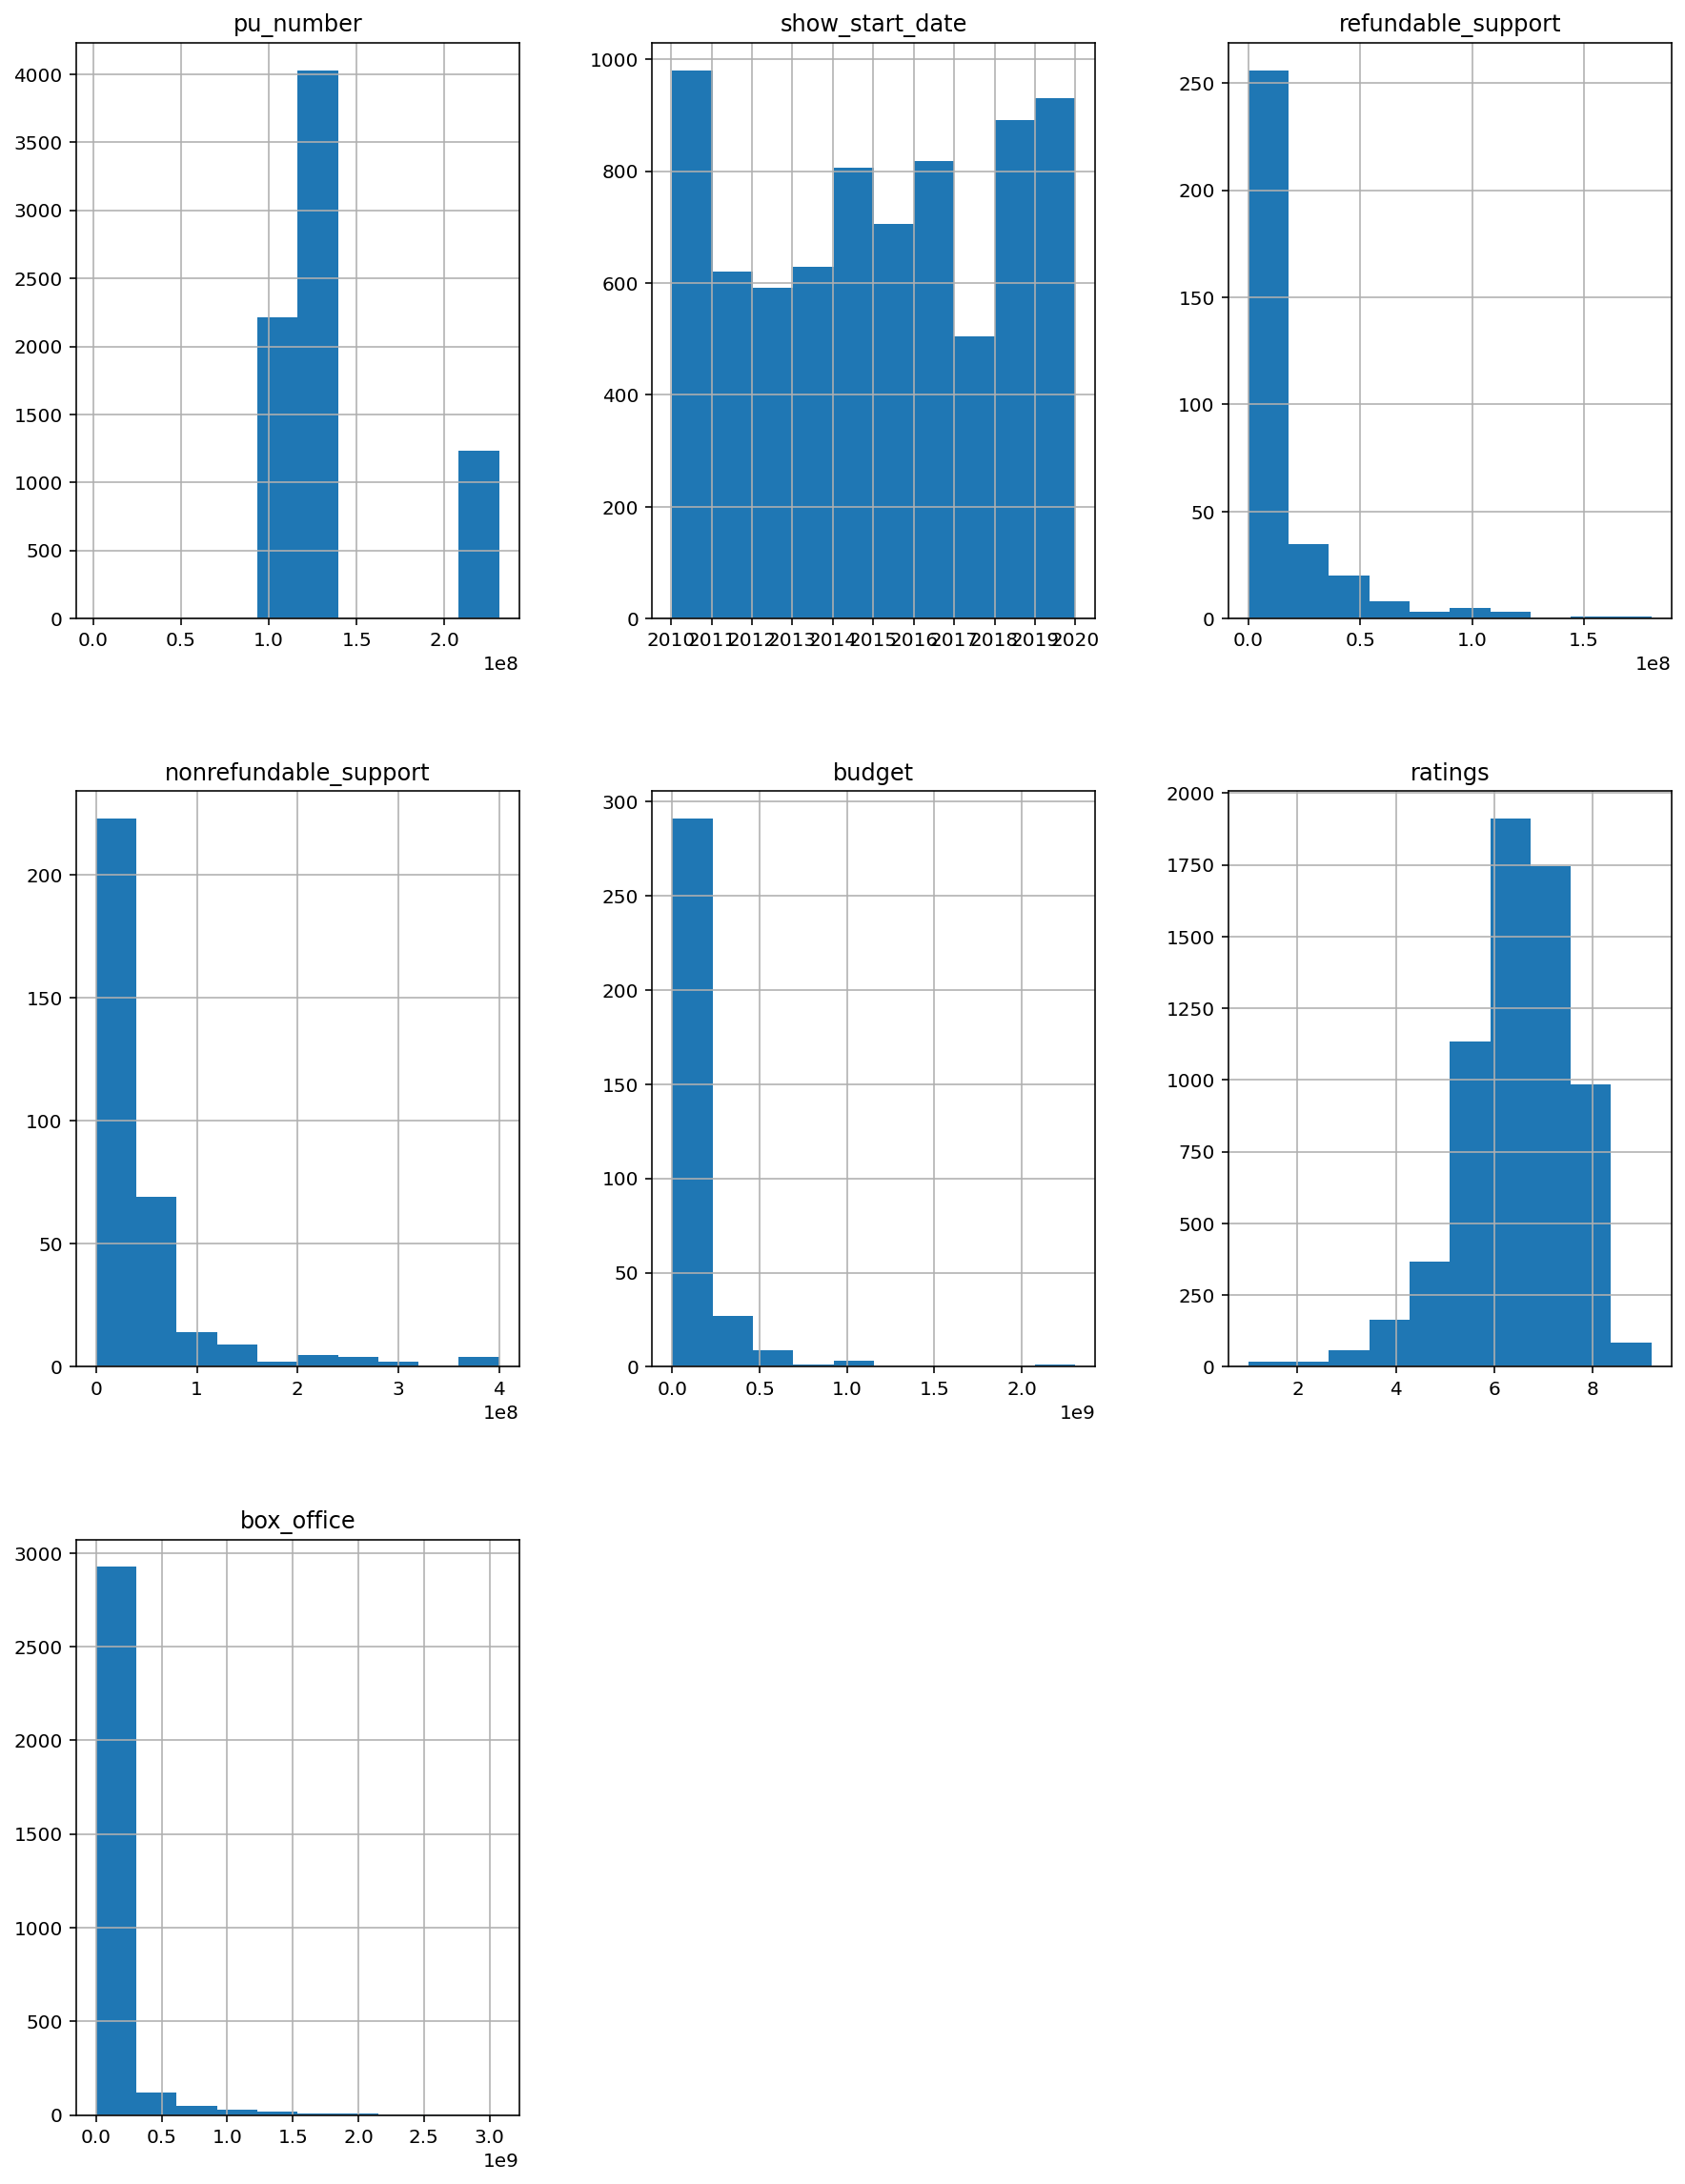

In [51]:
# Гистограмма для всех числовых столбцов позволит выявить данные, которые необходимо предобработать.
data.hist(figsize=(15, 20))
plt.show()

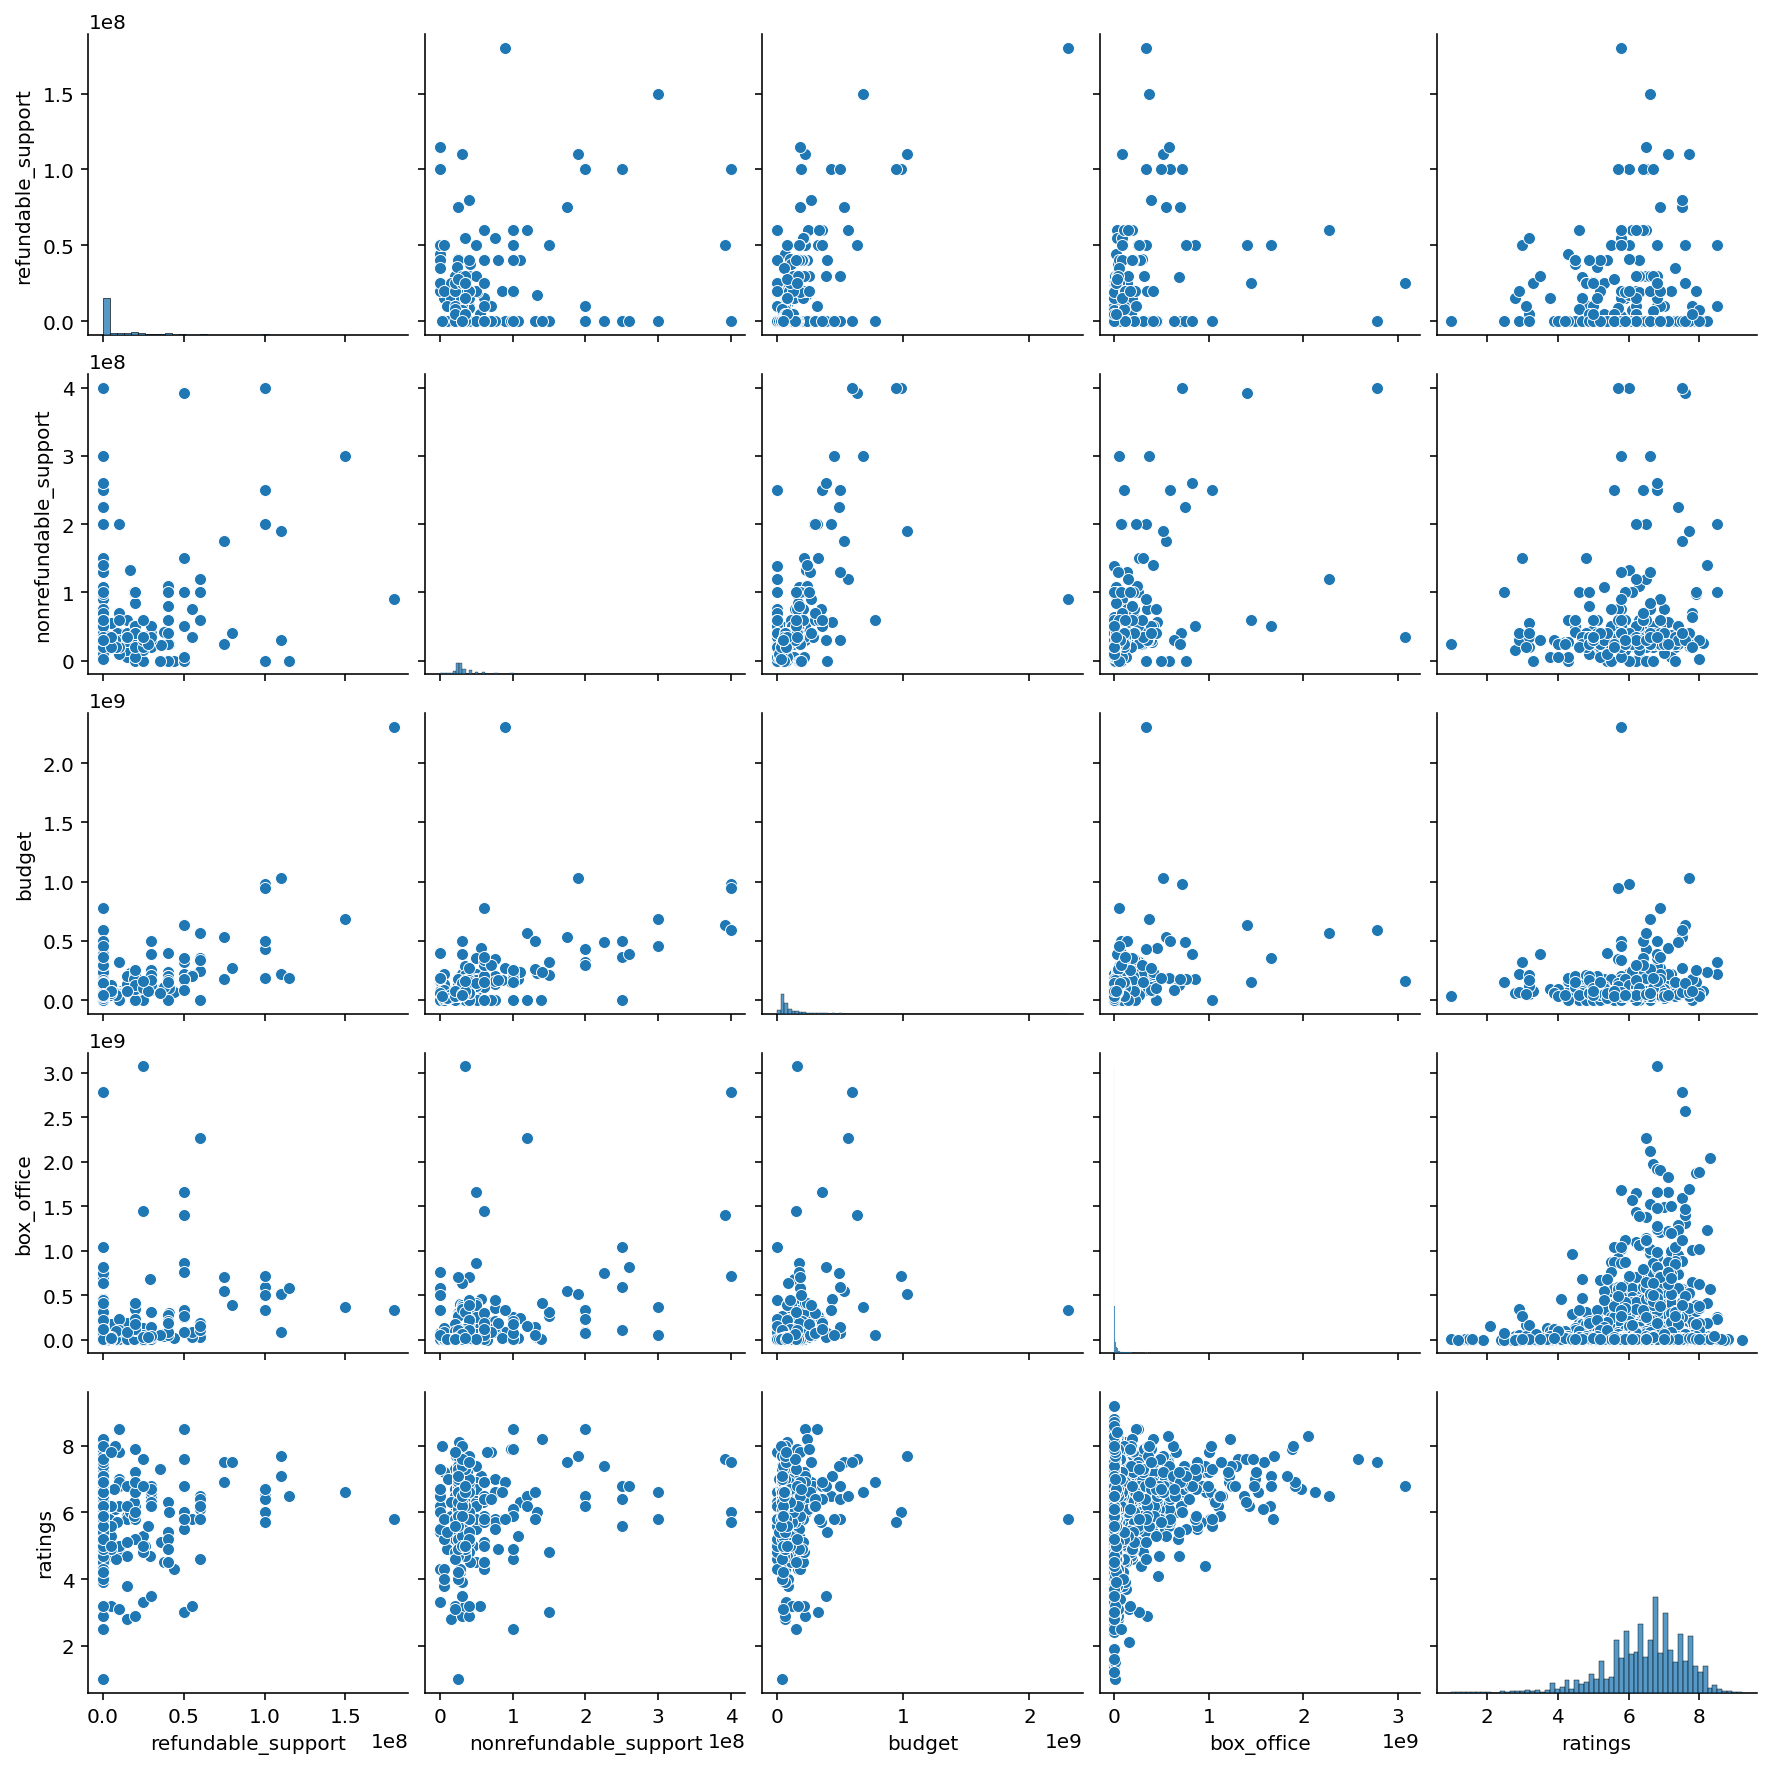

In [52]:
# Таблица графиков распределения числовых столбцов:
sns.pairplot(data[['refundable_support', 'nonrefundable_support', 'budget', 'box_office', 'ratings']])
plt.show()

<font color="grey">Визуализация распределения числовых данных позволяет обнаружить подозрительные значения. Отдельные точки на графиках, единичные отстоящие от общей массы пики и длинная ось х характеризуют наличие единичных выпадающих значений почти во всех столбцах. Рассмотрим их подробнее.</font>

In [53]:
# Создадим функцию, выводящую график распределения и диаграмму размаха:
def research_plot(description):
    plt.figure(figsize=(12, 4)) # общие условия формата графиков

# Создание графика разброса значений параметра:
    plt.subplot(1, 2, 1)
    plot1 = description.plot(style='o', color='grey', markersize = 2, grid=True)
    plt.xlabel('проекты')
    plt.ylabel(description_y_name)
    plt.title('Распределение проектов по значению \n'+description_name)

# Создание диаграммы размаха для визуализации наличия выпадающих значений:
    plt.subplot(1, 2, 2)
    plot2 = description.plot(kind='box')
    plt.xlabel('проекты')
    plt.ylabel(description_y_name)
    plt.title('Диаграмма размаха по значению \n'+description_name)

    return plot1, plot2

In [54]:
# Создадим функцию для оценки основных аналитических характеристик:
def describe_column(description):
    return description.describe()

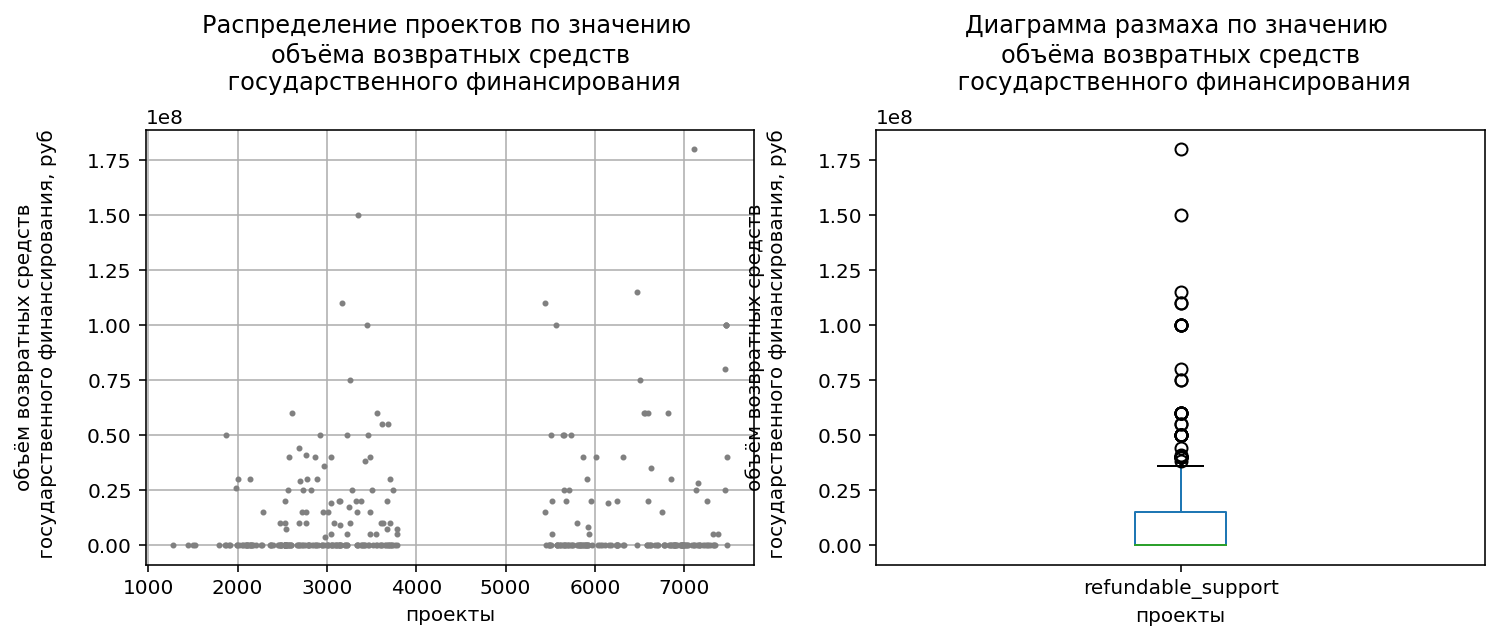

count          332.0
mean      11864457.0
std       24916554.0
min              0.0
25%              0.0
50%              0.0
75%       15000000.0
max      180000000.0
Name: refundable_support, dtype: float64

In [107]:
description = data['refundable_support']
column_name = 'refundable_support'
description_y_name = 'объём возвратных средств\n государственного финансирования, руб\n'
description_name = 'объёма возвратных средств\n государственного финансирования\n'

plt.show(research_plot(description))
describe_column(description)

<font color="grey">Медианное и среднее значения сильно сдвинуты к нулю, так как количество проектов с нулевым объёмом возвратных средств очень велико. Визуально можно предположить, что значения после 50 млн единичны. Чтобы убедиться в этом, рассмотрим подробнее распределение количества проектов размером возвратных средств более этого значения.</font>

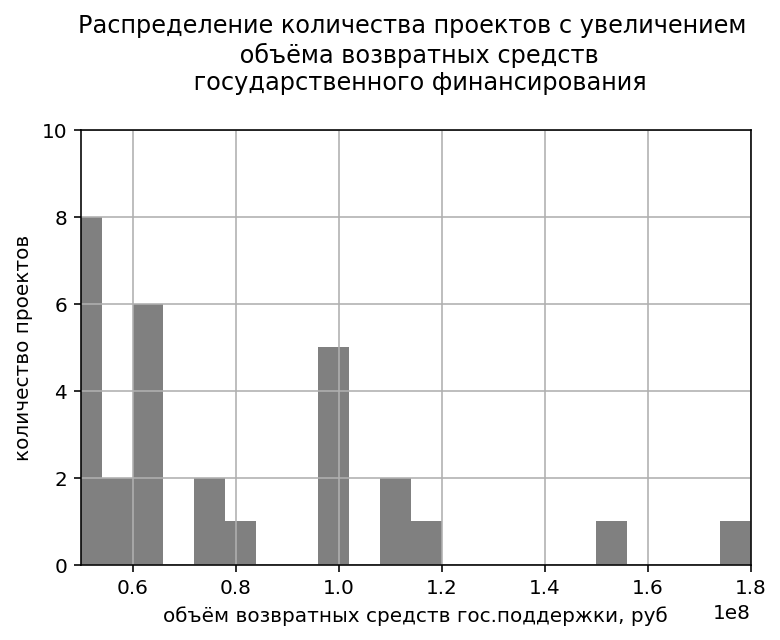

In [108]:
data['refundable_support'].plot(kind='hist',
                   color='grey',
                   bins=30,
                   xlim=(0.5*1e8, 1.8*1e8),
                   ylim=(0, 10),
                   grid=True
)
plt.xlabel('объём возвратных средств гос.поддержки, руб')
plt.ylabel('количество проектов')
plt.title('Распределение количества проектов с увеличением \n объёма возвратных средств\n государственного финансирования\n')

plt.show()

In [57]:
print('Количество проектов -', len(data[data['refundable_support'] >= 0.75*1e8]))
print('Доля проектов в базе данных -', 
      "%.2f" % 
      (len(data[data['refundable_support'] >= 0.75*1e8]) / data['refundable_support'].count() * 100)+'%'
)

Количество проектов - 13
Доля проектов в базе данных - 3.92%


<font color="grey">Удаление такой доли информации может негативно сказаться на оценке госфинансирования, так как количество проектов с господдержкой не много. Эти выпадающие значения можно оставить и проводить анализ с учётом возможных выпадов.</font>

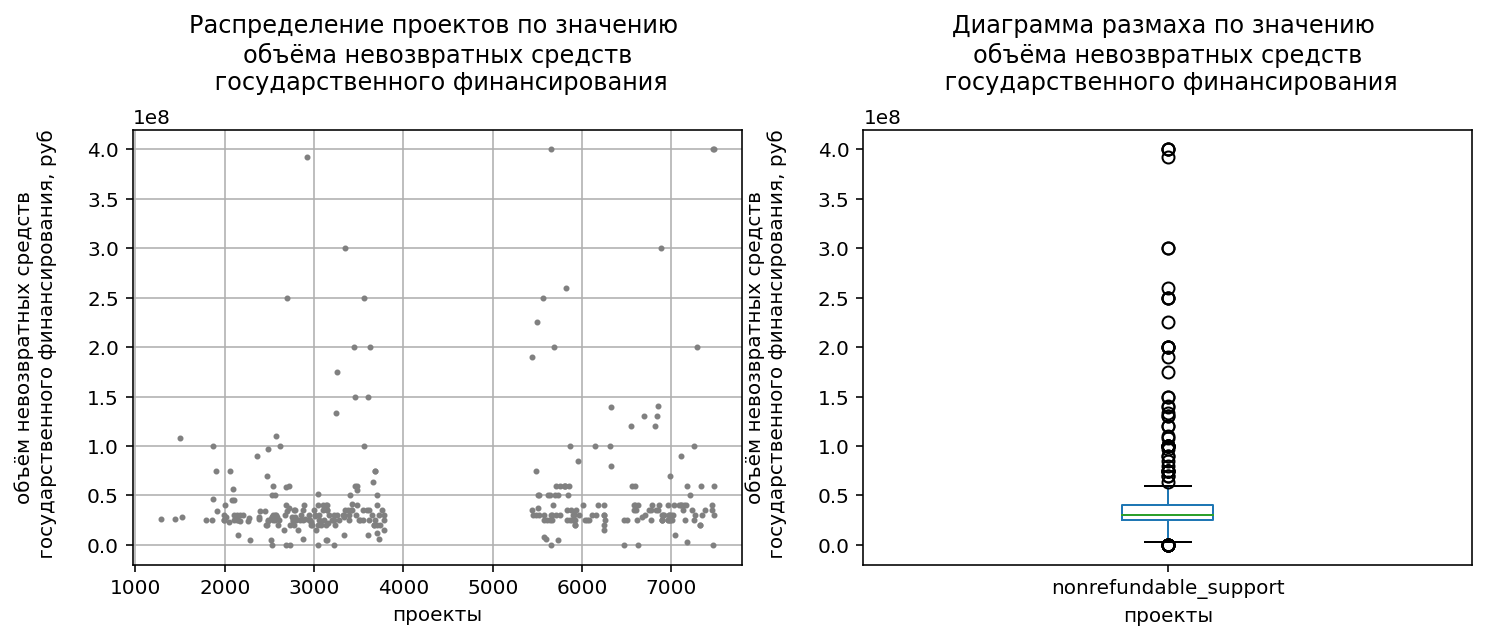

count          332.0
mean      48980984.0
std       59980116.0
min              0.0
25%       25000000.0
50%       30000000.0
75%       40375000.0
max      400000000.0
Name: nonrefundable_support, dtype: float64

In [109]:
description = data['nonrefundable_support']
column_name = 'nonrefundable_support'
description_y_name = 'объём невозвратных средств\n государственного финансирования, руб\n'
description_name = 'объёмa невозвратных средств\n государственного финансирования\n'

plt.show(research_plot(description))
describe_column(description)

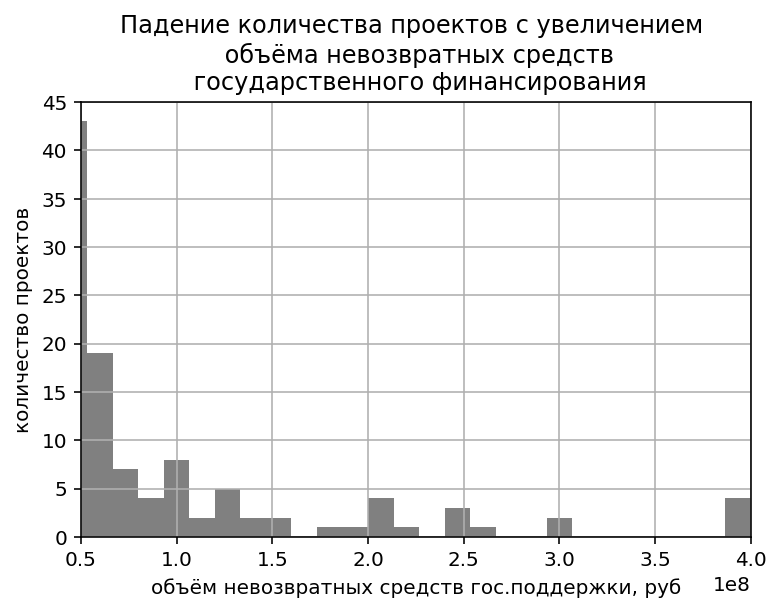

In [111]:
data['nonrefundable_support'].plot(kind='hist',
                   color='grey',
                   bins=30,
                   xlim=(0.5*1e8, 4*1e8),
                   ylim=(0, 45),
                   grid=True
)
plt.xlabel('объём невозвратных средств гос.поддержки, руб')
plt.ylabel('количество проектов')
plt.title('Падение количества проектов с увеличением \n объёма невозвратных средств\n государственного финансирования')

plt.show()

In [60]:
print('Количество проектов -', len(data[data['nonrefundable_support'] >= 3*1e8]))
print('Доля проектов в базе данных -', 
      "%.2f" % 
      (len(data[data['nonrefundable_support'] >= 3*1e8]) / data['nonrefundable_support'].count() * 100)+'%'
)

Количество проектов - 6
Доля проектов в базе данных - 1.81%


<font color="grey">Как показывают подчёты, база данных проектов с государственным финансированием так мала, что даже 6 фильмов представляют почти два процента объёма данных. Удалять их не следует.</font>

- Следующий к рассмотрению будет столбец с общим бюджетом проекта. Выявить в нём ошибки будет сложно, так как бюджет определяет множетсво факторов и внутренних характеристик проекта. Так запись и трансляция концерта будет иметь значительно меньший бюджет, нежели создание крупномасштабного художественного или анимационного фильма.

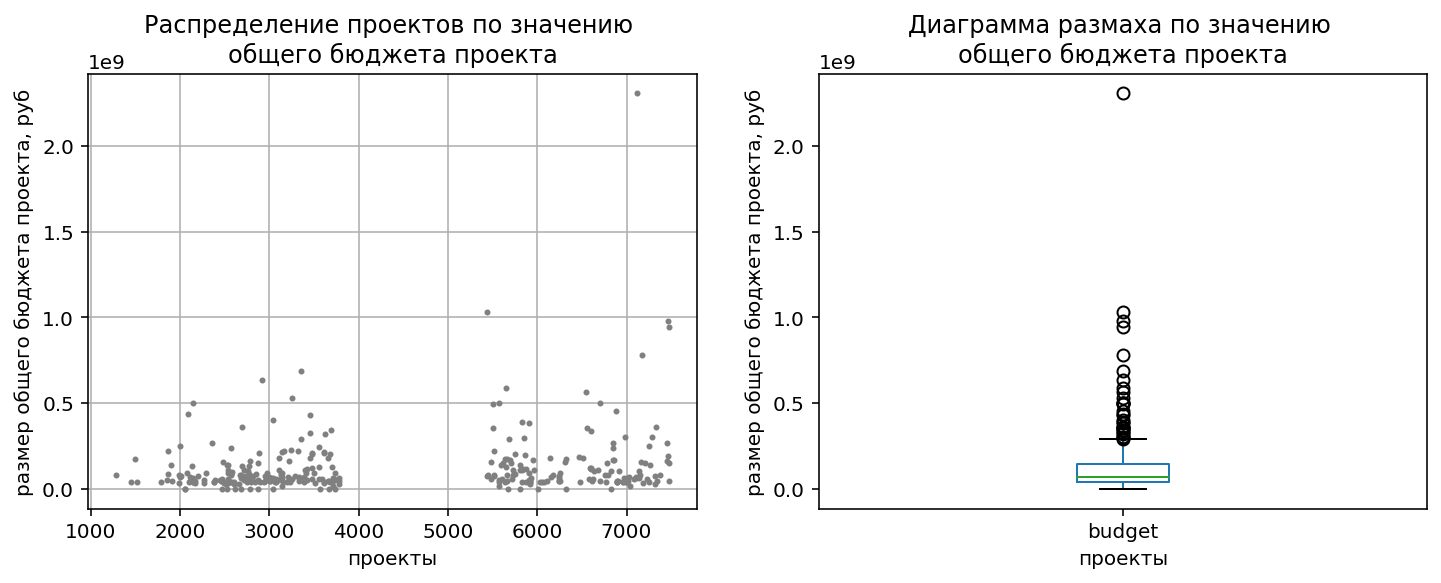

count    3.320000e+02
mean     1.272297e+08
std      1.885883e+08
min      0.000000e+00
25%      4.200000e+07
50%      6.864992e+07
75%      1.419853e+08
max      2.305074e+09
Name: budget, dtype: float64

In [61]:
description = data['budget']
column_name = 'budget'
description_y_name = 'размер общего бюджета проекта, руб'
description_name = 'общего бюджета проекта'

plt.show(research_plot(description))
describe_column(description)

<font color="grey">На графике распределения очевидны выпады: слишком большие значения, которые могли быть записаны в неправильных единицах измерения и подозрительное количество нулевых. Рассмотрим более подробно распределение значений около экстреммумов.</font>

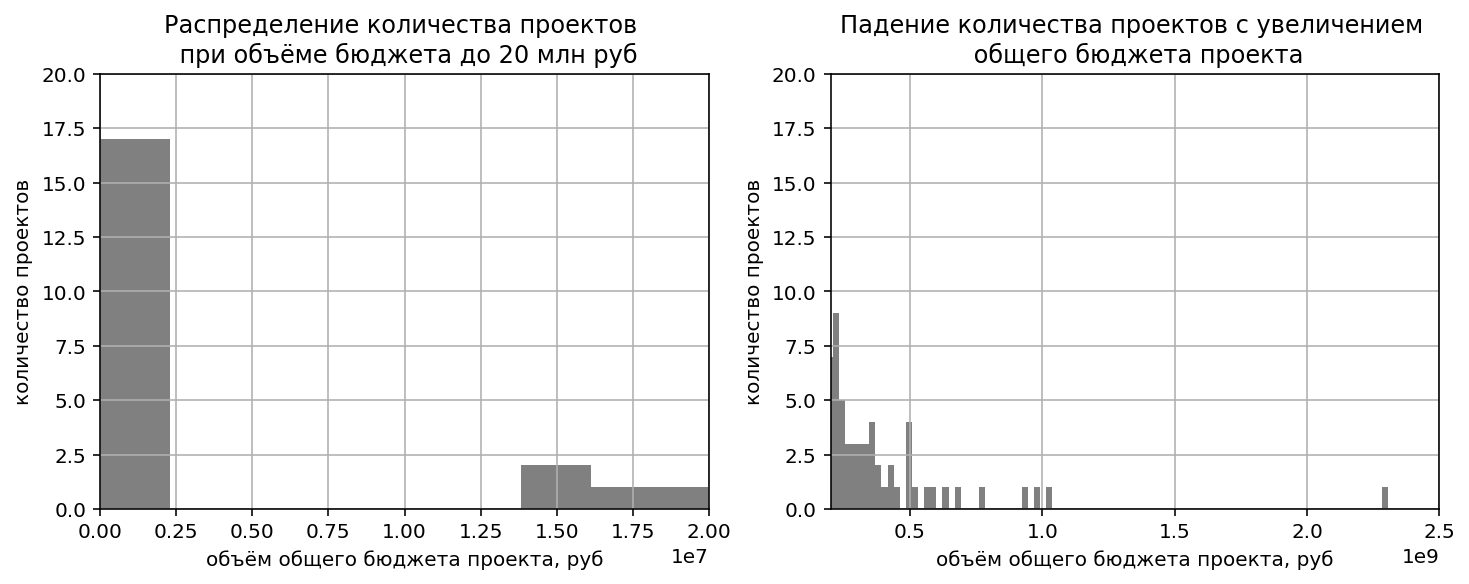

In [62]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
data['budget'].plot(kind='hist',
                   color='grey',
                   bins=100,
                   xlim=(2*1e8, 2.5*1e9),
                   ylim=(0, 20),
                   grid=True
)
plt.xlabel('объём общего бюджета проекта, руб')
plt.ylabel('количество проектов')
plt.title('Падение количества проектов с увеличением \n общего бюджета проекта')

plt.subplot(1, 2, 1)
data['budget'].plot(kind='hist',
                   color='grey',
                   bins=1000,
                   xlim=(0, 0.2*1e8),
                   ylim=(0, 20),
                   grid=True
)
plt.xlabel('объём общего бюджета проекта, руб')
plt.ylabel('количество проектов')
plt.title('Распределение количества проектов \n при объёме бюджета до 20 млн руб')


plt.show()

<font color="grey">Проекты с нулевым бюджетом скорее всего - вариант неправильной записи отсутствия данных, поэтому их значения надо заменить на Nan.</font>

In [63]:
data['budget'] = np.where(data['budget'] == 0, np.nan, data['budget'])

In [64]:
print('Количество проектов с бюджетом более 600 млн руб -', len(data[data['budget'] > 0.7*1e9]))
print('Доля проектов в базе известных данных -', 
      "%.2f" % 
      (len(data[data['budget'] > 0.7*1e9]) / data['budget'].count() * 100)+'%'
)

Количество проектов с бюджетом более 600 млн руб - 5
Доля проектов в базе известных данных - 1.59%


In [65]:
display(data[data['budget'] > 0.7*1e9])

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5436,Матильда,111005717,2017-08-17 12:00:00,Художественный,"ООО ""ТПО ""РОК"", ООО ""Матильда""",Россия,А. Учитель,"А. Учитель, А. Достман, В. Винокур",«16+» - для детей старше 16 лет,110000000.0,190000000.0,1.032906e+09,Фонд кино,7.7,"фэнтези, комедия, семейный",511775552.0
7113,Тайна Печати Дракона,111012819,2019-09-12 12:00:00,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...",Россия-Китай,О. Степченко,"С. Сельянов, А. Петрухин",«6+» - для детей старше 6 лет,180000000.0,90000000.0,2.305074e+09,Фонд кино,5.8,"приключения, фэнтези",333597056.0
7170,Грех,111014419,2019-08-31 12:00:00,Художественный,НО Фонд Андрея Кончаловского по поддержке кино...,Россия-Италия,А. Михалков (псевдоним А. Кончаловский),НО Фонд Андрея Кончаловского по поддержке кино...,«16+» - для детей старше 16 лет,0.0,60000000.0,7.799420e+08,Министерство культуры,6.9,"драма, биография, история",54243204.0
7463,Союз спасения,111022019,2019-12-26 12:00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А. Кравчук,"А. Максимов, К. Эрнст",«12+» - для детей старше 12 лет,100000000.0,400000000.0,9.800000e+08,Фонд кино,6.0,"история, биография, драма",717703168.0
7473,Вторжение,111022519,2019-12-23 12:00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф. Бондарчук,"Ф. Бондарчук, М. Врубель, А. Андрющенко, Д. Ру...",«12+» - для детей старше 12 лет,100000000.0,400000000.0,9.440000e+08,Фонд кино,5.7,"фантастика, боевик",NaN


<font color="grey">Доля очень дорогих проектов не велика даже в сравнении с малым количеством имеющихся данных о бюджете. Однако их исключение может исказить данные о проектах в разбивки по другим характеристикам, например по годам или гос.финансированию. К тому же пиковые значения бюджета приходятся на проекты, участвующие в софинансировании, а таких в нашей базе мало и их потеря может сильно сказаться на анализе. Кроме того, все максимальные значения соттветствуют кассовым фильмам крупных проектов и наличие такого бюджета реально.</font>

- Столбец с информацией о кассовых сборах проектов был добавлен из другой таблицы и имеет много пропусков. Посмотрим, нет ли в нём проблем с единицами измерения и нулевыми значениями, образовавшихся из-за слияния таблиц.

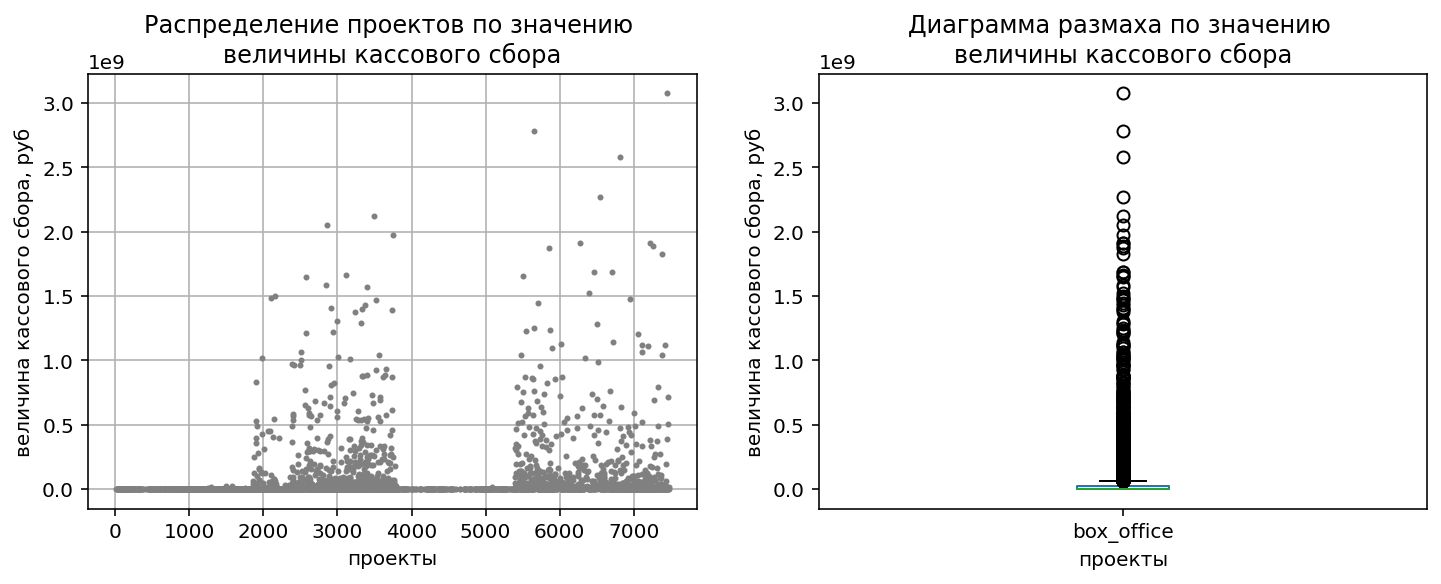

count    3.157000e+03
mean     7.650291e+07
std      2.403874e+08
min      0.000000e+00
25%      8.638600e+04
50%      2.330104e+06
75%      2.398312e+07
max      3.073569e+09
Name: box_office, dtype: float64

In [66]:
description = data['box_office']
column_name = 'box_office'
description_y_name = 'величина кассового сбора, руб'
description_name = 'величины кассового сбора'

plt.show(research_plot(description))
describe_column(description)

<font color="grey">Изменим значение нулевых кассовых сборов на Nan:
</font>

In [67]:
data['box_office'] = np.where(data['box_office'] == 0, np.nan, data['box_office'])

In [68]:
data['box_office'].unique().tolist()

[nan,
 2700.0,
 360.0,
 420.0,
 380.0,
 1165.0,
 22660.0,
 84720.0,
 1795.0,
 300.0,
 67500.0,
 1850.0,
 200.0,
 3040.0,
 2260.0,
 2890.0,
 197464.5,
 39680.0,
 5000.0,
 759526.0,
 1093810.0,
 1125302.0,
 1948760.0,
 4808.0,
 843310.0,
 102940.0,
 1300.0,
 3370.0,
 40.0,
 11960.0,
 165.0,
 100.0,
 1525.0,
 520.0,
 2060.0,
 14650.0,
 550.0,
 35945.0,
 2490.0,
 460.0,
 150.0,
 8640.0,
 405.0,
 7800.0,
 1900.0,
 18600.0,
 1825.0,
 1020.0,
 28150.0,
 3270.0,
 1149.0,
 2400.0,
 880.0,
 425.0,
 1400.0,
 1100.0,
 370.0,
 883640.0,
 3550.0,
 745510.0,
 1017220.0,
 45905.0,
 470427.0,
 6775.0,
 12779.0,
 30500.0,
 13350.0,
 10310.0,
 30715.0,
 760.0,
 1070.0,
 10470.0,
 1600.0,
 240.0,
 16330.0,
 3590.0,
 620.0,
 6900.0,
 5760.0,
 1920.0,
 2680.0,
 210.0,
 5560.0,
 780.0,
 24000.0,
 235.0,
 17680.0,
 3490.0,
 1460.0,
 12708.0,
 22175.0,
 2200.0,
 14438.0,
 480.0,
 8000.0,
 6000.0,
 82400.0,
 20145.0,
 1440.0,
 2311220.0,
 17020.0,
 11400.0,
 23930.0,
 7150.0,
 85153.0,
 6220.0,
 585.0,
 41510.0

<font color="grey">Значения кассовых сборов слишком нелогичны и могут быть записаны в различных единицах измерения(млн в том же столбце, что и тысячи или неправильная валюта), а могут соответствовать низкобюджетным проектам или старым кинолентам, получившим новую аккредитацию. Несмотря на замену нулевых значений, множество проектов остаётся в минимальной зоне. Причины появления малых значений кассовых сборов может быть много: низкие рейтинги фильма и провал в прокате или мы имеем локальное мероприятие, например, запись концерта и изначально не высокий бюджет. Так же можно предположить, что при наличии дублирующих друг друга проектов с разными номерами прокатного удостоверения статистика кассовых сборов ведётся для каждого номера отдельно, а не для ленты в целом. Однако наиболее вероятна ошибка при заполнении - не одинаковые единицы измерения. Решить эту проблему трудно, так как не известно, на сколько порядков идёт ошибка. Рассмотрим, как распеределяются проекты в диапазоне малых значений проката.</font>

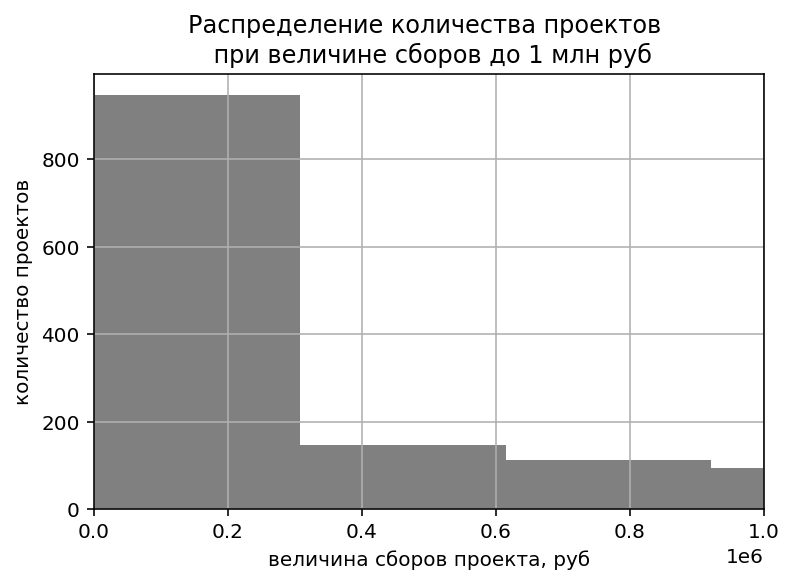

In [69]:
data['box_office'].plot(kind='hist',
                   color='grey',
                   bins=10000,
                   xlim=(0, 1*1e6),
                   grid=True
)
plt.xlabel('величина сборов проекта, руб')
plt.ylabel('количество проектов')
plt.title('Распределение количества проектов \n при величине сборов до 1 млн руб')
plt.show()

In [70]:
print('Количество проектов с величиной сборов менее 300 тыс руб -', len(data[data['box_office'] < 0.3*1e6]))
print('Доля проектов в базе известных данных -', 
      "%.2f" % 
      (len(data[data['box_office'] < 0.3*1e6]) / data['box_office'].count() * 100)+'%'
)

Количество проектов с величиной сборов менее 300 тыс руб - 946
Доля проектов в базе известных данных - 30.19%


<font color="grey">Количество проектов с подозрительно низкими значениями кассовых сборов слишком велико для исключения. На этапе предобработке их не следует трогать, но при анализе необходимо учитывать их наличие и при необходимости отсечь в конечных выводах характеристики или периоды их наибольшего влияния.</font>

- Столбец с рейтингом был заполнен автоматически из данных портала КиноПоиска и отражает оценку зрителей портала по каждому фильму с конкретным номером проканого удостоверения.

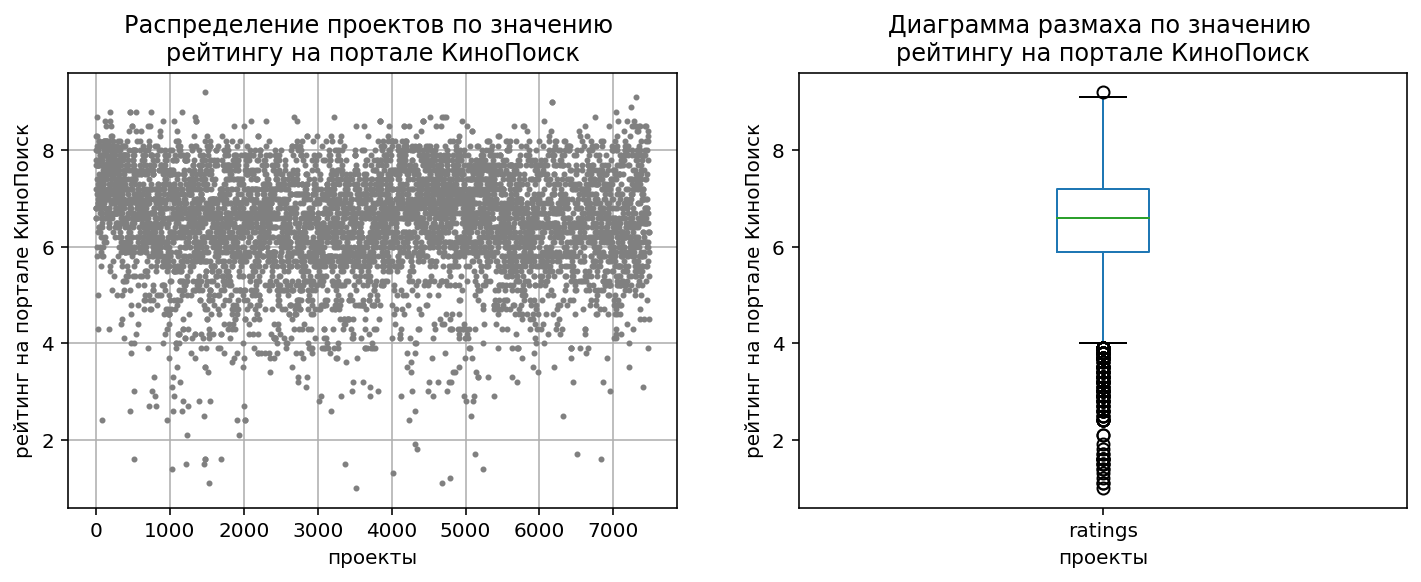

count    6487.000000
mean        6.479374
std         1.101345
min         1.000000
25%         5.900000
50%         6.600000
75%         7.200000
max         9.200000
Name: ratings, dtype: float64

In [71]:
description = data['ratings']
column_name = 'ratings'
description_y_name = 'рейтинг на портале КиноПоиск'
description_name = 'рейтингу на портале КиноПоиск'

plt.show(research_plot(description))
describe_column(description)

<font color="grey">Данные выглядят логично и целостно, несомтря на наличие низких рейтингов за пределами минимальной границы диаграммы размаха. Эти минимумы могут соответствовать специфическому авторскому кино, документальным произведениям или страым лентам с плохими техническими характеристиками качества, имеющим низкие спрос и оценку.</font>

<div style="border:solid grey 1px; padding: 20px">
    На этапе рассмотрения числовых данных обнаружилось несколько столбцов с большим количеством выпадающих значений. В имеющихся данных было решено заменить отсутствующими значениями только нулевые значения бюджетов. Экстреммумы в характеристиках общего бюджета, суммах выделенного софинансирования и величинами прокатных средств было решено не трогать, так как они либо оправданы, либо не имеют логической замены, а их потеря может быть критичной.

####  Добавление новых столбцов на основе имеющихся данных





- Для удобства анализа изменений характеристик по годам cоздадим столбец с информацией о годе проката, выделив год из даты премьеры фильма.

In [102]:
data['show_start_year'] = data['show_start_date'].dt.year

- Для быстрого анализа создателей проекта и распределению финансовых характеристик по жанрам создадим два новых столбца: с именем и фамилией главного режиссёра и основным жанром фильма, выделив первые значения из списка режиссёров и жанров соответственно.

In [73]:
# Зададим функцию, которая выдели первые значения в каждой строке:
def first_value(s, sep = ','):
    value_lst = s.split(sep=sep)
    return value_lst[0]

# Вызовем функцию внутри метода добавления столбца для новых характеристик:
data['main_director'] = data['director'].apply(first_value)
data['main_genre'] = data['genres'].apply(first_value)

In [103]:
data.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genre,gos_fond_rate
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик, драма, мелодрама",NaN,2015,Кевин Костнер,боевик,NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е. Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма, военный",NaN,2016,Е. Матвеев,драма,NaN
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е. Платт, Яйн ...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика, боевик, триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е. Платт, Яйн ...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика, боевик, триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е. Платт, Яйн ...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика, боевик, триллер",NaN,2015,Тимур Бекмамбетов,фантастика,NaN


- Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка. Она получается из отношения объёма возвратных и невозвратных средств к общему бюджету.

In [75]:
data['gos_fond_rate'] = ((data['refundable_support'] 
                         + data['nonrefundable_support']) 
                         / data['budget'] * 100).apply(lambda x: format(x, '.2f')).astype(float)

In [76]:
# Для проверки отберём только проекты с гос.поддержкой:
df = data.dropna(subset=['refundable_support'])
df.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genre,gos_fond_rate
1281,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А. Атанесян,"А. Атанесян, М. Бабаханов, Р. Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411904.0,Министерство культуры,8.1,"драма, мелодрама",3.653536e+05,2013,А. Атанесян,драма,33.37
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А. Якимчук,А. Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142856.0,Министерство культуры,NaN,не указано,2.814000e+04,2014,А. Якимчук,не указано,70.00
1498,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р. Давлетьяров, С. Комаров","Р. Давлетьяров, А. Котелевский, А. Олейников",«12+» - для детей старше 12 лет,0.0,107847944.0,176023488.0,Фонд кино,5.3,"комедия, фантастика",1.995703e+07,2013,Р. Давлетьяров,комедия,61.27
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е. Миндадзе (псевдоним Катя Шагалова),Л. Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,5.591750e+04,2014,Е. Миндадзе (псевдоним Катя Шагалова),драма,69.01
1792,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М. Угаров,"А. Миндадзе, Л. Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015120.0,Министерство культуры,6.4,драма,2.321000e+05,2014,М. Угаров,драма,62.48


<font color="grey">Посмотрим, насколько правдоподобны получились результаты с учётом наличия экстреммумов в начальных данных.</font>

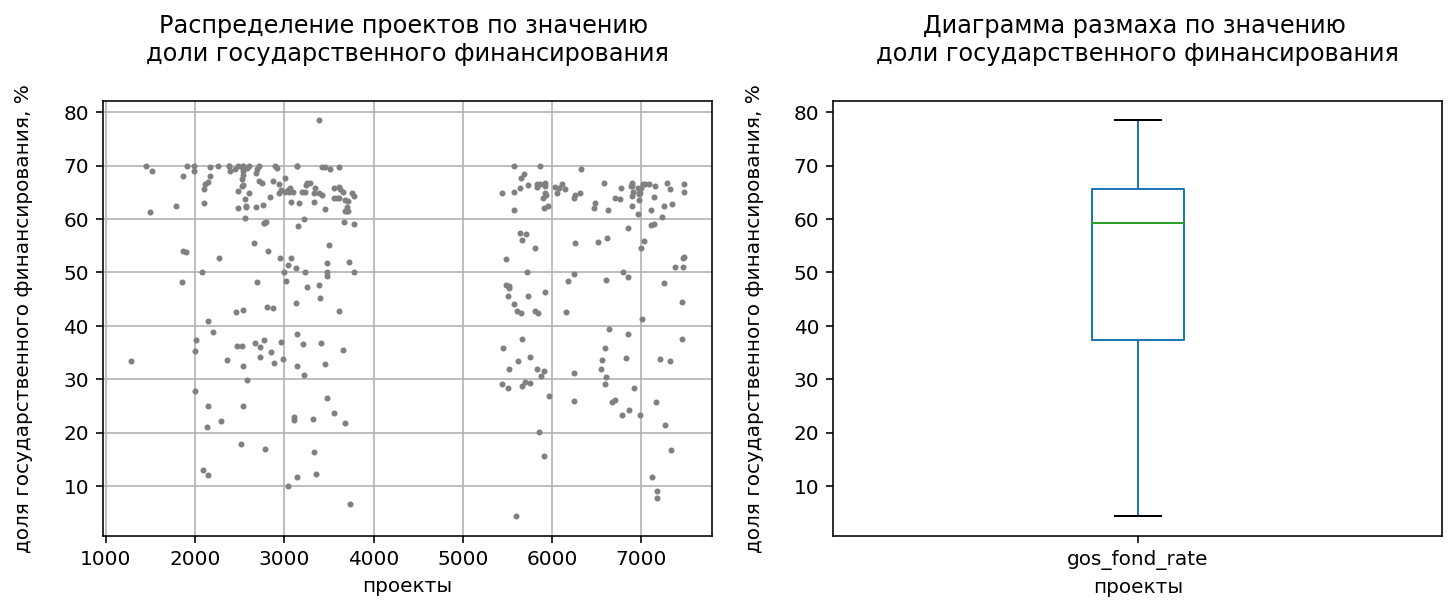

count    315.000000
mean      51.738762
std       17.004822
min        4.400000
25%       37.345000
50%       59.230000
75%       65.690000
max       78.470000
Name: gos_fond_rate, dtype: float64

In [112]:
description = df['gos_fond_rate']
column_name = 'gos_fond_rate'
description_y_name = 'доля государственного финансирования, %\n'
description_name = 'доли государственного финансирования\n'

plt.show(research_plot(description))
describe_column(description)

<font color="grey">Все значения попадают в рабочий диапазон несмотря на наличие отдельных выбивающихся из общей группы точек на графике рассеивания.</font>

**Вывод**

<div style="border:solid grey 1px; padding: 20px">
    Для удобства анализа изменений характеристик по годам был создан столбец с годом выхода ленты в прокат, выделенный из даты премьеры фильма. Это позволит оценить изменение вкусов зрителей и влияние на отрасль внешних факторов (этономических, политических и социальных). Для быстрого анализа создателей проекта и распределению финансовых характеристик по жанрам первые значения из списка режиссёров и жанров соответственно были выделены в отдельные столбцы. Это позволит снизить количество вариантов одной и той же характеристики для удобной группировки. Так же в отдельный столбей была записана доля государственного финансирования в общем бюджете проекта. Она поможет оценить изменение вклада государственной поддержки  на протяжении изучаемого периода.

### Исследовательский анализ данных по годам за период 2010-2019гг


- Наличие в данных даты выхода проекта в прокат позволяет проанализировать как много фильмов выходило в прокат по годам, как влияют сезонность или внешние экономические, политические или социальные факторы.

<font color="grey">Посмотрим, сколько фильмов выходило в прокат каждый год. Данные о прокате в кинотеатрах известны не для всех фильмов. Подсчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах по годам.</font>

In [78]:
print('Доля проектов с указанной информацией о прокате состовляет',
      format((data['box_office'].count() / len(data['box_office']) * 100), '.2f')+'%'
)

Доля проектов с указанной информацией о прокате состовляет 41.91%


In [79]:
# Сгруппируем данные в новую переменную и применим к столбцам аггрегацию некоторыми функциями:
year_group = data.groupby('show_start_year')[['title', 'box_office']]\
                  .agg({'title': 'count', 'box_office':['count', 'sum']})\
                  .reset_index()

# Добавим столбец с долей известного проката:
year_group['rate'] = (year_group['box_office']['count'] / year_group['title']['count'] * 100)\
                        .apply(lambda x: format(x, '.2f'))\
                        .astype('float32')

display(year_group)

show_start_year title box_office                     rate
                  count      count           sum           
0            2010   980        101  2.428654e+06  10.310000
1            2011   620        109  1.410276e+07  17.580000
2            2012   592        122  6.911073e+06  20.610001
3            2013   629        179  2.979971e+07  28.459999
4            2014   806        273  7.444952e+09  33.869999
5            2015   705        462  3.949736e+10  65.529999
6            2016   818        525  4.786630e+10  64.180000
7            2017   505        357  4.856371e+10  70.690002
8            2018   891        475  4.966840e+10  53.310001
9            2019   930        530  4.842571e+10  56.990002

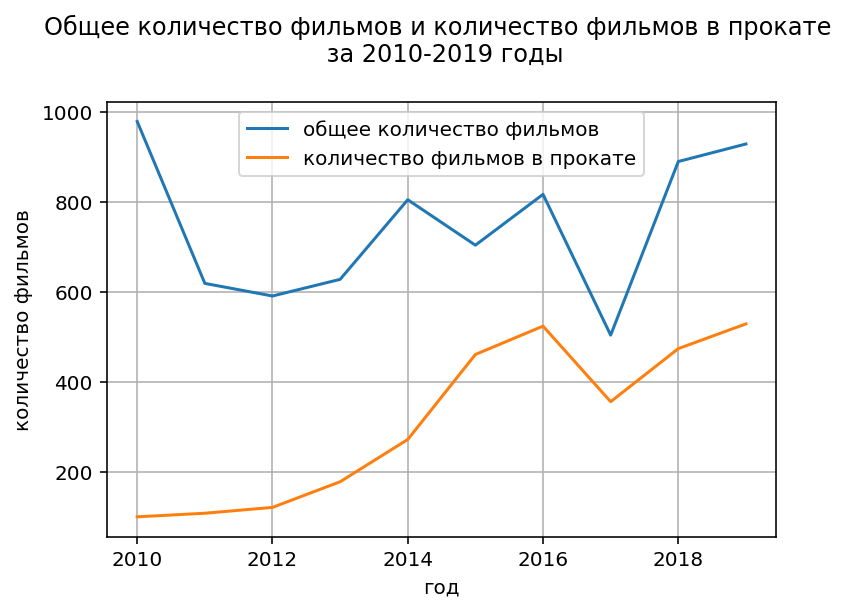

In [113]:
# Построим график значений общего количества аккредитованных фильмов и 
# сведений проката:
plt.plot(year_group['show_start_year'], year_group['title']['count'],  label='общее количество фильмов')
plt.plot(year_group['show_start_year'], year_group['box_office']['count'], label='количество фильмов в прокате')
plt.grid(True)
plt.xlabel('год')
plt.ylabel('количество фильмов')
plt.title('Общее количество фильмов и количество фильмов в прокате \n за 2010-2019 годы\n')
plt.legend()
plt.show()

<font color="grey">Резкий пик общего числа фильмов при малом количестве проката в начале анализируемого периода объясняется получением новых прокатных удостоверений для ранее выпущенных фильмов и заполнением базы данных порталом Министерства культуры, откуда и были взяты сведения для исследования. Мягкий подъем количества сведений о прокате говорит о росте объёма предложений и развитии отрасли. Причиной падения количества фильмов по обеим позициям в 2017 году могло быть резкое падение спроса на просмотр кино в кинотеатре, вызванное пересыщением рынка, несколькими крупными провалами премьер, а так же скачком развития конкурентного телевизионного и интернет-проката, последовавшего за несколькими крупными и успешными премьерами сериалов. Дальнейший скромный, но уверенный рост говорит о стабилизации ситуации с выпуском фильмов в кинотеатры. Таким образом можно сказать, что период с 2015 года полнее представлен данными о прокате, нежели более ранние годы, когда медленнее происходило заполнение баз данных взятых для исследования порталов. </font>

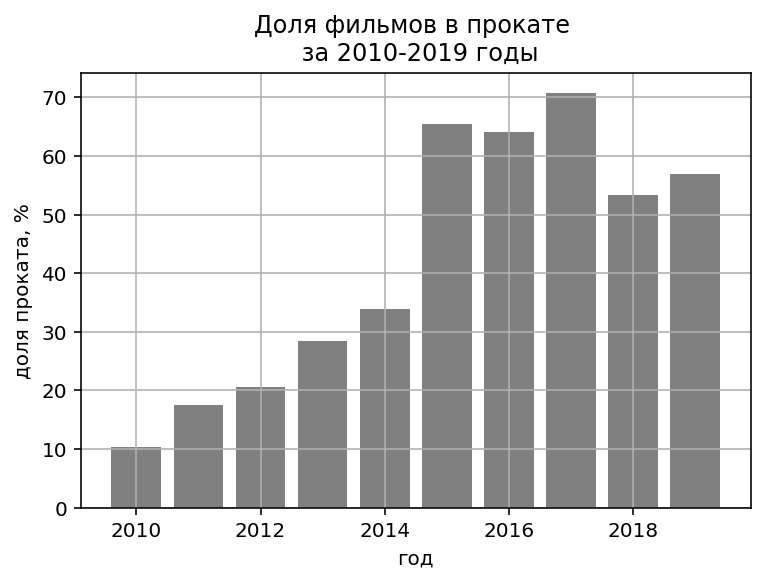

In [81]:
#  Посмотрим на изменеие доли информации о прокатных фильмах:
plt.bar(x=year_group['show_start_year'], height=year_group['rate'], color='grey')
plt.grid(True)
plt.xlabel('год')
plt.ylabel('доля проката, %')
plt.title('Доля фильмов в прокате \n за 2010-2019 годы')
plt.show()

<font color="grey">Растущая доля проката с 2010 по 2014 годы объясняется развитием индустрии, увеличением количества прокатных фильмов и заполнением базы данных используемых порталов. Резкий скачок 2015 года связан с падением общего числа фильмов и ростом проката. Наибольший пик в 2017 год, а так же уменьшение доли проката в последующие годы, связаны с резким падением общего количества зарегестрированных фильмов. Однако в 2018-2019 году вновь можно наблюдать положительную динамику и в характеристиках проката, и в общем количестве зарегистрированных фильмов. </font>

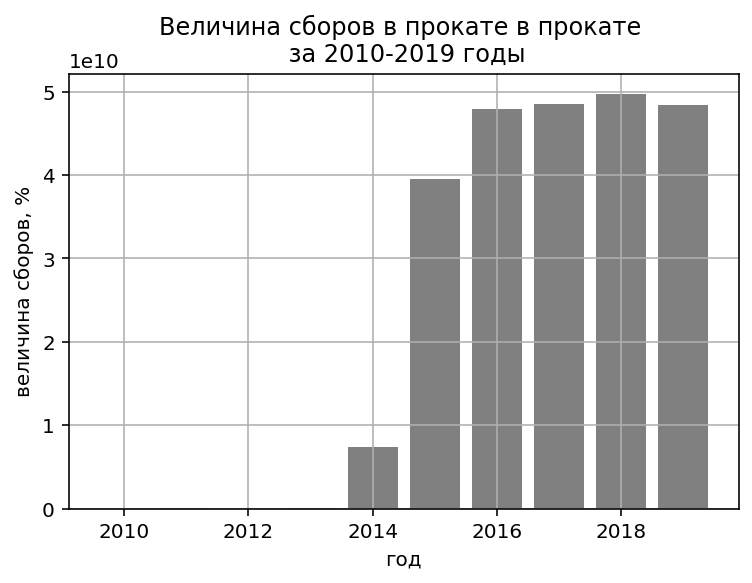

In [82]:
plt.bar(x=year_group['show_start_year'], height=year_group['box_office']['sum'], color='grey')
plt.grid(True)
plt.xlabel('год')
plt.ylabel('величина сборов, %')
plt.title('Величина сборов в прокате в прокате \n за 2010-2019 годы')
plt.show()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
К 2018 году сборы достигли воих максимальных показателей. 

<font color="grey">Минимальные значения сумм сборов проката до 2014 года отсылают к ошибке заполнения данных и внесению в базу размеров прокатных сборов в неправильных единицах. Проанализировать возможно лишь данные после 2015 года, по росту которых можено понять, что несмотря на проблемы индустрии в 2017 году, до 2018 года динамика положительная и в российских кинотеатрах кассовые сборы росли. Спад значений в 2019 году может говорить о неполных данных за год, неудачных премьерах на отечественных эктранах и выборе зрителем альтернативных способов просмотра фильмов.</font>

In [83]:
# Наличие экстреммумов по годам пожно понять из сравнения среднего арифметического и медианного:
year_pivot = (pd.pivot_table(data,
               index = 'show_start_year',
               values = ['box_office'],
               aggfunc = ['median', 'mean'])
               .reset_index()
)
display(year_pivot)

,show_start_year,median,mean
,,box_office,box_office
0,2010,1710.0,2.404608e+04
1,2011,3000.0,1.293832e+05
2,2012,6110.0,5.664814e+04
3,2013,3580.0,1.664788e+05
4,2014,20400.0,2.727089e+07
5,2015,5003450.0,8.549214e+07
6,2016,3915041.0,9.117390e+07
7,2017,9968340.0,1.360328e+08
8,2018,8891102.0,1.045651e+08


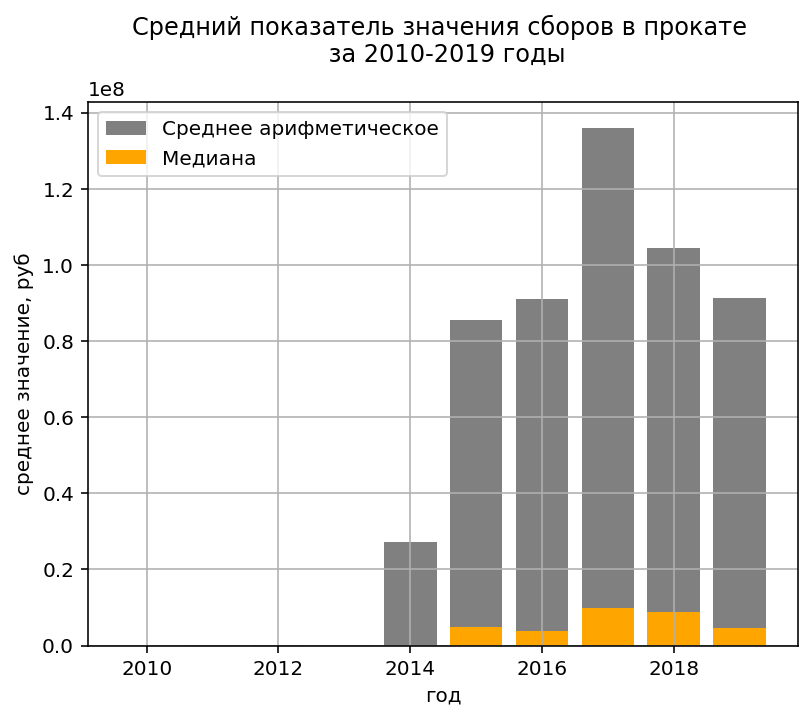

In [114]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.bar(x=year_pivot['show_start_year'], height=year_pivot['mean']['box_office'], color='grey')
plt.bar(x=year_pivot['show_start_year'], height=year_pivot['median']['box_office'], color='orange')
plt.grid(True)
plt.xlabel('год')
plt.ylabel('среднее значение, руб')
plt.title('Средний показатель значения сборов в прокате \n за 2010-2019 годы\n')
plt.legend(['Среднее арифметическое', 'Медиана'])

plt.show()

<font color="grey">Рассматривать данные возможно лишь с 2015 по 2019 годы, так как в более ранние периоды есть ошибка заполнения данных.
Средние значения сборов существенно колеблятся в рассматриваемый период. В первую очередь можно заметить пик обоих средних показателей, приходящийся на 2017 год. В совокупности с падением общего числа прокатных фильмов в этот период можно сказать, что остававшиеся в прокате фильмы были кассовыми и в общей массе подняли планку уровня сборов. Снижение медианного значения при высоком среднем значении в 2016 и 2018 годах говорит о наличии в эти периоды нескольких крупных кассовых предложений, повышающих среднее арифметическое, при общей массе с низкими сборами, смещающими медиану к меньшим значениям.</font>

- Определим влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год.

In [85]:
# Сгруппируем данные в сводную таблицу по возрастной категории:
age_group = pd.pivot_table(data,
                          index=['show_start_year', 'age_restriction'],
                          values=['box_office'],
                          aggfunc=['count', 'sum']).reset_index()
display(age_group)

,show_start_year,age_restriction,count,sum
,,,box_office,box_office
0,2010,«0+» - для любой зрительской аудитории,22,1.887611e+06
1,2010,«12+» - для детей старше 12 лет,17,1.201460e+05
2,2010,«16+» - для детей старше 16 лет,54,3.665120e+05
3,2010,«18+» - запрещено для детей,8,5.438500e+04
4,2011,«0+» - для любой зрительской аудитории,30,1.349987e+07
5,2011,«12+» - для детей старше 12 лет,22,2.198910e+05
6,2011,«16+» - для детей старше 16 лет,54,3.815130e+05
7,2011,«18+» - запрещено для детей,2,1.040000e+03
8,2011,«6+» - для детей старше 6 лет,1,4.500000e+02


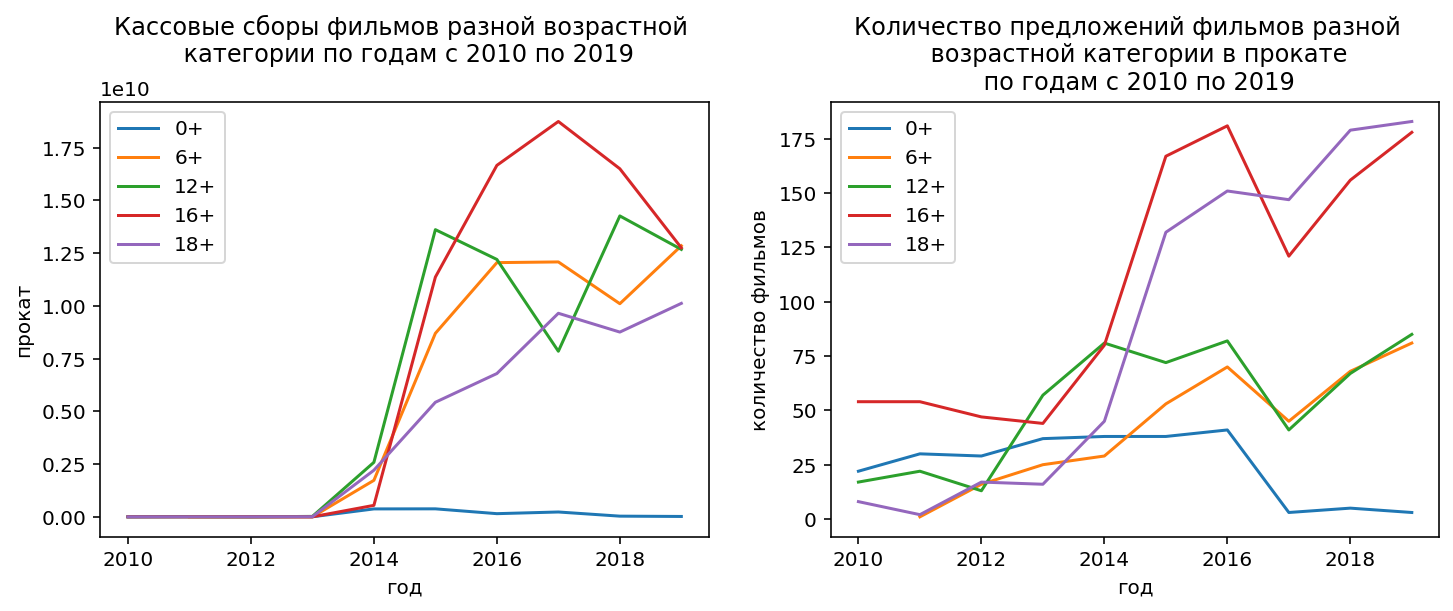

In [115]:
# Разделим линии зависимостей по каждой категории
age_0 = age_group.loc[age_group['age_restriction'] == '«0+» - для любой зрительской аудитории'].reset_index(drop=True)
age_6 = age_group.loc[age_group['age_restriction'] == '«6+» - для детей старше 6 лет'].reset_index(drop=True)
age_12 = age_group.loc[age_group['age_restriction'] == '«12+» - для детей старше 12 лет'].reset_index(drop=True)
age_16 = age_group.loc[age_group['age_restriction'] == '«16+» - для детей старше 16 лет'].reset_index(drop=True)
age_18 = age_group.loc[age_group['age_restriction'] == '«18+» - запрещено для детей'].reset_index(drop=True)

# Общая характеристика фигуры:
plt.figure(figsize=(12, 4))

# Построим графики зависимостей кассовых сборов по годам для каждой категории:
plt.subplot(1, 2, 1)
plt.plot(age_0['show_start_year'], age_0['sum']['box_office'])
plt.plot(age_6['show_start_year'], age_6['sum']['box_office'])
plt.plot(age_12['show_start_year'], age_12['sum']['box_office'])
plt.plot(age_16['show_start_year'], age_16['sum']['box_office'])
plt.plot(age_18['show_start_year'], age_18['sum']['box_office'])

plt.xlabel('год')
plt.ylabel('прокат')
plt.title('Кассовые сборы фильмов разной возрастной \n категории по годам с 2010 по 2019\n')
plt.legend(['0+', '6+', '12+', '16+', '18+'])

# Посторим графики количества проектов по гопам для каждой категории:
plt.subplot(1, 2, 2)
plt.plot(age_0['show_start_year'], age_0['count']['box_office'])
plt.plot(age_6['show_start_year'], age_6['count']['box_office'])
plt.plot(age_12['show_start_year'], age_12['count']['box_office'])
plt.plot(age_16['show_start_year'], age_16['count']['box_office'])
plt.plot(age_18['show_start_year'], age_18['count']['box_office'])

plt.xlabel('год')
plt.ylabel('количество фильмов')
plt.title('Количество предложений фильмов разной  \n возрастной категории в прокате\n по годам с 2010 по 2019')
plt.legend(['0+', '6+', '12+', '16+', '18+'])

# Выведем графики:
plt.show()

<font color="grey">Проекты самой общей категории (0+ - для любой зрительской аудитории) имеют наименьшее количество предложений и кассовых сборов на протяжении всего исследуемого периода. Несмотря на небольшой подьём в количестве к 2016 году, их выпускается значительно меньше, а в 2017-2019 наблюдается существенный спад. Фильмы для детей из категорий 6+ и 12+ имеют схожее поведение графиков количества проектов: динамичный рост к 2016 году, провал в 2017 и воз-врат примерно к тем же значениям в 2018-2019 годах. Однако кассовые сборы этих категорий в 2017-2018 годах принципиально различны: при падении показателя одной категории растёт показатель второй, и наоборот в следующем году. Эта смена связана с выпуском в прокат популярных проектов для разных категорий в разные годы. Категория проектов 16+ интересна не только резким ростом количества предложений с 2013 по 2016 годы, но и таким же резким подъёмом кассовых средств. Это можно объяснить желанием индустрии привлечь более молодого зрителя и снижением возрастного ценза новых проектов. Резкий спад количества сборов при увеличении количества предложений в 2019 году может характеризовать неудачные премъеры для этой возрастной категории. Категория фильмов 18+ на протяжении всего изучаемого периода улучшает обе характеристики: даже не смотря на небольшое падение, наблюдаемое в 2017 году, и количество предложений, и прокатные сборы растут от года к году.</font>

**Вывод**

<div style="border:solid grey 1px; padding: 20px">
    На начало анализируемого периода приходится получение новых прокатных удостоверений для ранее выпущенных фильмов и заполнение базы данных порталом Министерства культуры, откуда и были взяты сведения для исследования. Мягкий подъем количества сведений о прокате говорит о росте объёма предложений и развитии отрасли. Причиной падения количества фильмов и сборов в 2017 году могло быть резкое падение спроса на просмотр кино в кинотеатре, вызванное пересыщением рынка, несколькими крупными провалами премьер, а так же скачком развития конкурентного телевизионного и интернет-проката, последовавшего за несколькими крупными и успешными премьерами сериалов. Дальнейший скромный, но уверенный рост говорит о стабилизации ситуации с выпуском фильмов в кинотеатры. Таким образом можно сказать, что период с 2015 года полнее представлен данными о прокате, нежели более ранние годы, когда медленнее происходило заполнение баз данных взятых для исследования порталов. Наибольшее число фильмов в прокате замечено в 2016 и 2019 годах. Это отразилось и на кассовых сборах: с 2016 года их величина резко выросла. Несмотря на меньшее количество предложений в 2017 году кассове сборы в этот период не упали, что характерно для проката успешных лент, понравившихся зрителям. Это подтверждается пиковыми значениями средних показателей за год: наличие малого количества проектов с большими кассовыми сборами сместило медианное и среднее арифметическое этого параметра к максимуму за исследуемый период. Падение средних значений в последующие годы при сохранении уровня общего дохода от проката  и росте количества предложений говорит о выходе менее успешных лент в этот период. Изучение влияния предпочтений зрителей проводилось на основе зависимостей величины кассовых сборов от возрастного ценза проектов в течение всего исследуемого периода. В ходе анализа было выявлено, что наиболее многочислены и популярны оказывались проекты для детей и подростков. В то время как фильмы для взрослой аудитории хоть и имели большее количество предложений, зачастую имели меньший успех. Это может быть связано с социальными факторами: с ребёнком чаще всего присутствует сопровождение, а развлекательный контент подходит широкой аудитории. Также замечено, что проекты, предназанченные для всех возрасных категорий являются наменее многочислены и приносят наименьшие суммы сборов. 

### Исследование фильмов, которые получили государственную поддержку


Некоторые проекты получают государственное финансирование. Их доля в прокате сравнительно мала. Государственная поддержка кинематографа в России существует уже давно, но с новой силой она заработала с 2013 года и статистика ведётся с этого периода. Фонд кино как правило финансирует коммерчески успешные проекты (или те проекты, которые имеют шансы на коммерческий успех), а
Министерство культуры – дебютное, экспериментальное, детское и документальное кино. В целом, можно сказать, что финанисироются социально значимые, патриотические и как правило, не очень дорогие проекты. Посмотрим, какое количество сведений о проектах с государственной поддержкой имеется в анализируемой базе данных.

In [87]:
gos_help = data.dropna(subset=['financing_source'])
print('Доля финансированных проектов в имеющейся базе даннх составляет ', 
      "%.2f" % (len(gos_help) / len(data) * 100),
      '%')
display(gos_help.head())

Доля финансированных проектов в имеющейся базе даннх составляет  4.44 %


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genre,gos_fond_rate
1281,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А. Атанесян,"А. Атанесян, М. Бабаханов, Р. Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411904.0,Министерство культуры,8.1,"драма, мелодрама",3.653536e+05,2013,А. Атанесян,драма,33.37
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А. Якимчук,А. Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142856.0,Министерство культуры,NaN,не указано,2.814000e+04,2014,А. Якимчук,не указано,70.00
1498,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р. Давлетьяров, С. Комаров","Р. Давлетьяров, А. Котелевский, А. Олейников",«12+» - для детей старше 12 лет,0.0,107847944.0,176023488.0,Фонд кино,5.3,"комедия, фантастика",1.995703e+07,2013,Р. Давлетьяров,комедия,61.27
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е. Миндадзе (псевдоним Катя Шагалова),Л. Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,5.591750e+04,2014,Е. Миндадзе (псевдоним Катя Шагалова),драма,69.01
1792,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М. Угаров,"А. Миндадзе, Л. Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015120.0,Министерство культуры,6.4,драма,2.321000e+05,2014,М. Угаров,драма,62.48


In [88]:
# Сформируем таблицу с общими суммами по годам:
gos_help_by_years = pd.pivot_table(gos_help,
                                   index='show_start_year',
                                   values=['refundable_support','nonrefundable_support', 'budget', 'box_office'],
                                   aggfunc='sum').reset_index()

# Добавим столбец общей суммы поддержки:
gos_help_by_years['support_sum'] = (gos_help_by_years['nonrefundable_support']\
                                      +gos_help_by_years['refundable_support']
)
# Добавим значение доли общего количества госпеддержки по годам, округлив проценты до целого: 
gos_help_by_years['rate_gos_help'] = (gos_help_by_years['support_sum']\
                                      /gos_help_by_years['budget'] * 100)\
                                      .round()
# Оценим результат:
display(gos_help_by_years)

,show_start_year,box_office,budget,nonrefundable_support,refundable_support,support_sum,rate_gos_help
0,2013,2.032239e+07,2.554354e+08,1.343479e+08,0.0,1.343479e+08,53.0
1,2014,1.017422e+09,1.279485e+09,5.010023e+08,71000000.0,5.720023e+08,45.0
2,2015,5.785286e+09,7.309669e+09,3.019088e+09,637153088.0,3.656241e+09,50.0
3,2016,6.081708e+09,7.228943e+09,3.381656e+09,921500032.0,4.303156e+09,60.0
4,2017,1.086508e+10,6.972173e+09,2.464625e+09,719346880.0,3.183972e+09,46.0
5,2018,9.934069e+09,6.651695e+09,2.784969e+09,662000000.0,3.446969e+09,52.0
6,2019,8.409628e+09,1.254287e+10,3.976000e+09,928000000.0,4.904000e+09,39.0


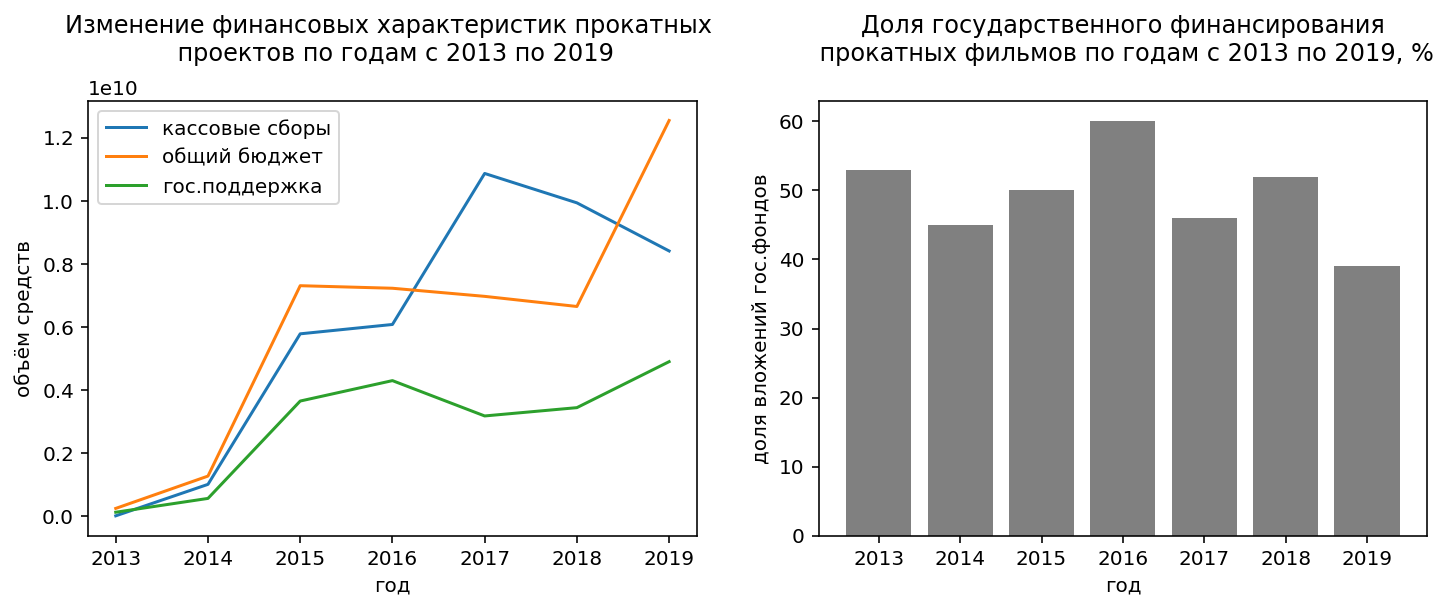

In [106]:
plt.figure(figsize=(12, 4))

# Сформируем график изменеия финансовых характеристик проектов по годам:
plt.subplot(1, 2, 1)
plt.plot(gos_help_by_years['show_start_year'], gos_help_by_years['box_office'])
plt.plot(gos_help_by_years['show_start_year'], gos_help_by_years['budget'])
plt.plot(gos_help_by_years['show_start_year'], gos_help_by_years['support_sum'])

plt.xlabel('год')
plt.ylabel('объём средств')
plt.title('Изменение финансовых характеристик прокатных \n проектов по годам с 2013 по 2019\n')
plt.legend(['кассовые сборы', 'общий бюджет', 'гос.поддержка'])

# Сформируем диаграмму доли финансируемых проектов по годам:
plt.subplot(1, 2, 2)
plt.bar(gos_help_by_years['show_start_year'], gos_help_by_years['rate_gos_help'], color='grey')

plt.xlabel('год')
plt.ylabel('доля вложений гос.фондов')
plt.title('Доля государственного финансирования\n прокатных фильмов по годам с 2013 по 2019, %\n')

plt.show()

<font color="grey">На протяжении всего исследуемого периода доля государственной поддержки в допущенных к софинансированию проектах составляет 40-60%. Наибольший вклад был внесён в проекты, выпущенные в 2016 году. 2014 и 2017 годы в виду ухудщения экономической ситуации имеют спады, однако за ними следует рост предложений софинансированных проектов. Кроме того ранее уже отмечено, что в 2017 году наблюдалось меньшее количество выпущенных в прокат филльмов, поэтому наблюдается снижение параметров софинансирования. Так же можно заметить, что график общей суммы госсподдержки повторяет график общего бюджета, что подтверждается примерно равным процентом софинансирования по годам. Кассовые сборы на начальном этапе в общей массе не превосходили бюджетные затраты проектов, но ситуация изменилась в 2017 и 2018 году, когда они превысилиобщий бюжет. Спад объема кассовых сборов в 2019 году может быть вызван не полными сведениями в базе занных за год или малым интересом зрителей к проектам. Посмотрим, как отражаются на объёме кассовых сборов выбор фонда финансирования.</font>

In [90]:
# Сформируем таблицу с общими суммами по годам:
gos_help_by_fonds = pd.pivot_table(gos_help,
                                   index='financing_source',
                                   values=['refundable_support','nonrefundable_support', 'budget', 'box_office'],
                                   aggfunc='sum')

# Добавим столбец общей суммы поддержки:
gos_help_by_fonds['support_sum'] = (gos_help_by_fonds['nonrefundable_support']\
                                      +gos_help_by_fonds['refundable_support'])

# Оценим результат:
display(gos_help_by_fonds)

,box_office,budget,nonrefundable_support,refundable_support,support_sum
financing_source,,,,,
Министерство культуры,5.322018e+09,1.146920e+10,4.836661e+09,0.000000e+00,4.836661e+09
"Министерство культуры, Фонд кино",8.053384e+08,2.626310e+09,8.599313e+08,3.255000e+08,1.185431e+09
Фонд кино,3.598615e+10,2.814475e+10,1.056510e+10,3.613500e+09,1.417860e+10


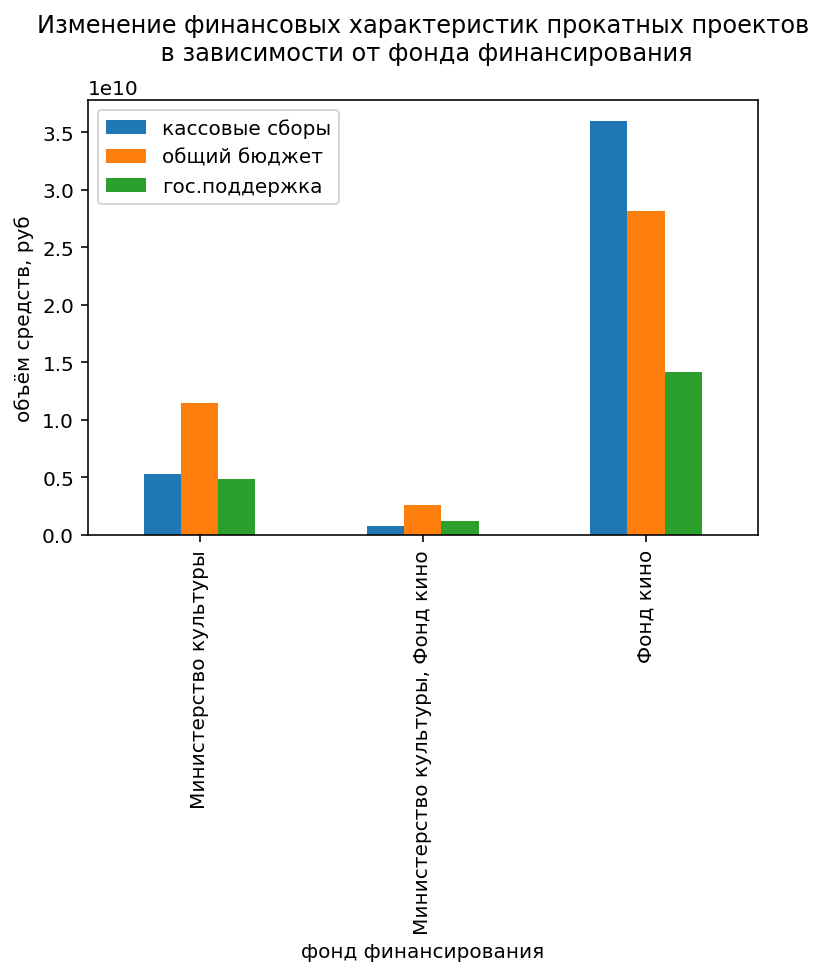

In [116]:
# Рассмотрим совокупно изменеие финансовых характеристик по годам:
gos_help_by_fonds[['box_office', 'budget', 'support_sum']].plot.bar()
plt.xlabel('фонд финансирования')
plt.ylabel('объём средств, руб')
plt.title('Изменение финансовых характеристик прокатных проектов\n в зависимости от фонда финансирования\n')
plt.legend(['кассовые сборы', 'общий бюджет', 'гос.поддержка'])
plt.show()

<font color="grey">Фонд кино выбирает для финансирования коммерчески выгодные проекты, поэтому объёмы кассовых сборов этой категории выше, чем у остальных и превышают общий бюджет проекта, содержащий финансовую помощь. Проекты министерства культуры, даже совместные с фондом кино, не окупают затрат и несут исключительно социально, политическое и культурное значение.</font>

- Существенное влияние должна оказывать возрасная категория, в которую определяется проект. Для детских и подростковых просветительских проектов фонды как правило выделяют средства чаще, нежели для фильмов только твзрослой категории. Кроме того, детские фильмы чаще оказываются более кассовыми, так как ребёнок идёт в сопровождении родителя, что расширяет аудиторию. 

In [92]:
# Сформируем таблицу с общими клочествами проектов разных возрастных категорий по фондам:
gos_help_age_by_fonds = pd.pivot_table(gos_help,
                                   index='financing_source',
                                   columns='age_restriction',
                                   values='main_genre',
                                   aggfunc='count')

# Оценим результат:
display(gos_help_age_by_fonds)

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
financing_source,,,,,
Министерство культуры,5.0,44.0,71.0,21.0,23.0
"Министерство культуры, Фонд кино",NaN,10.0,7.0,3.0,2.0
Фонд кино,3.0,52.0,47.0,4.0,40.0


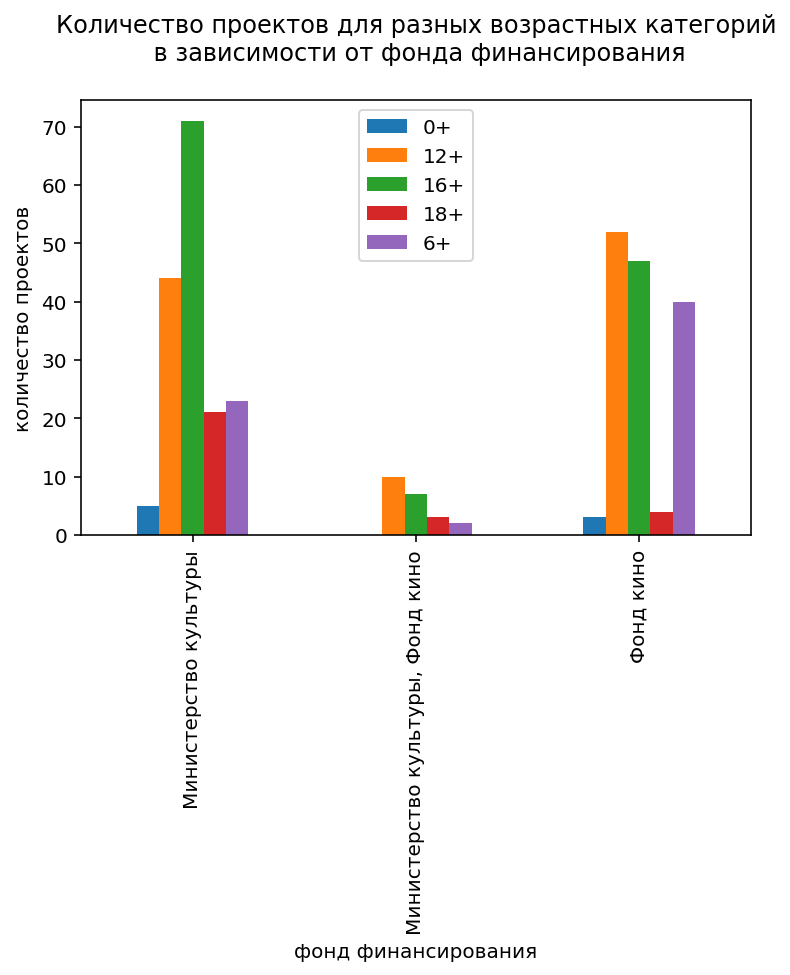

In [117]:
gos_help_age_by_fonds.plot.bar()
plt.xlabel('фонд финансирования')
plt.ylabel('количество проектов')
plt.title('Количество проектов для разных возрастных категорий\n в зависимости от фонда финансирования\n')
plt.legend(['0+', '12+', '16+', '18+', '6+'])
plt.show()

<font color="grey">Как показывает диаграмма оба фонда неохотно финансируют проекты для всех возрастных категориях, а совместных проектов с этой характеристикой нет совсем. Проекты для детей и подростков разных возрастов наиболее популярны для обоих фондов. Это может объясняться приоритетностью духовно-нравственного воспитания молодого покаления при рассмотрении заявок на финансирование. Проекты для взрослых охотнее финансируются министерством культуры, нежели фондом кино. Большее число проектов министерства культуры в категории "18+", нежели у фонда кино может быть связано с финанисрованием этого фонда дебютного, экспериментального и документального типа проектов.</font>

- Рассмотрим какие типы фильмов предпочитали финансировать фонды в исследуемый период:

In [94]:
# Сформируем таблицу с общими количествами разных типов проектов по фондам:
gos_help_type_by_fonds = pd.pivot_table(gos_help,
                                   index='financing_source',
                                   columns='type',
                                   values='main_genre',
                                   aggfunc='count')

# Оценим результат:
display(gos_help_type_by_fonds)

type,Анимационный,Документальный,Художественный
financing_source,,,
Министерство культуры,2.0,1.0,161.0
"Министерство культуры, Фонд кино",NaN,NaN,22.0
Фонд кино,29.0,NaN,117.0


<font color="grey">В преобладающем большинстве фонды отдавали предпочтение художественным фильмам, однако и анимационные фильмы также занимают существенную долю среди проектов фонда кино.</font>

In [95]:
# Сформируем таблицу с общими количествами проектов разных типов:
typs_table = pd.pivot_table(data,
                            index='show_start_year',
                            columns='type',
                            values='box_office',
                            aggfunc='count')

# Оценим результат:
display(typs_table)

type,Анимационный,Документальный,Музыкально-развлекательный,Научно-популярный,Прочие,Художественный
show_start_year,,,,,,
2010,19.0,1.0,NaN,2.0,0.0,79.0
2011,15.0,3.0,NaN,NaN,5.0,86.0
2012,28.0,1.0,NaN,0.0,3.0,90.0
2013,38.0,NaN,NaN,NaN,2.0,139.0
2014,28.0,NaN,NaN,1.0,7.0,237.0
2015,73.0,2.0,NaN,NaN,25.0,362.0
2016,76.0,9.0,NaN,1.0,44.0,395.0
2017,39.0,3.0,NaN,1.0,11.0,303.0
2018,50.0,7.0,NaN,3.0,21.0,394.0


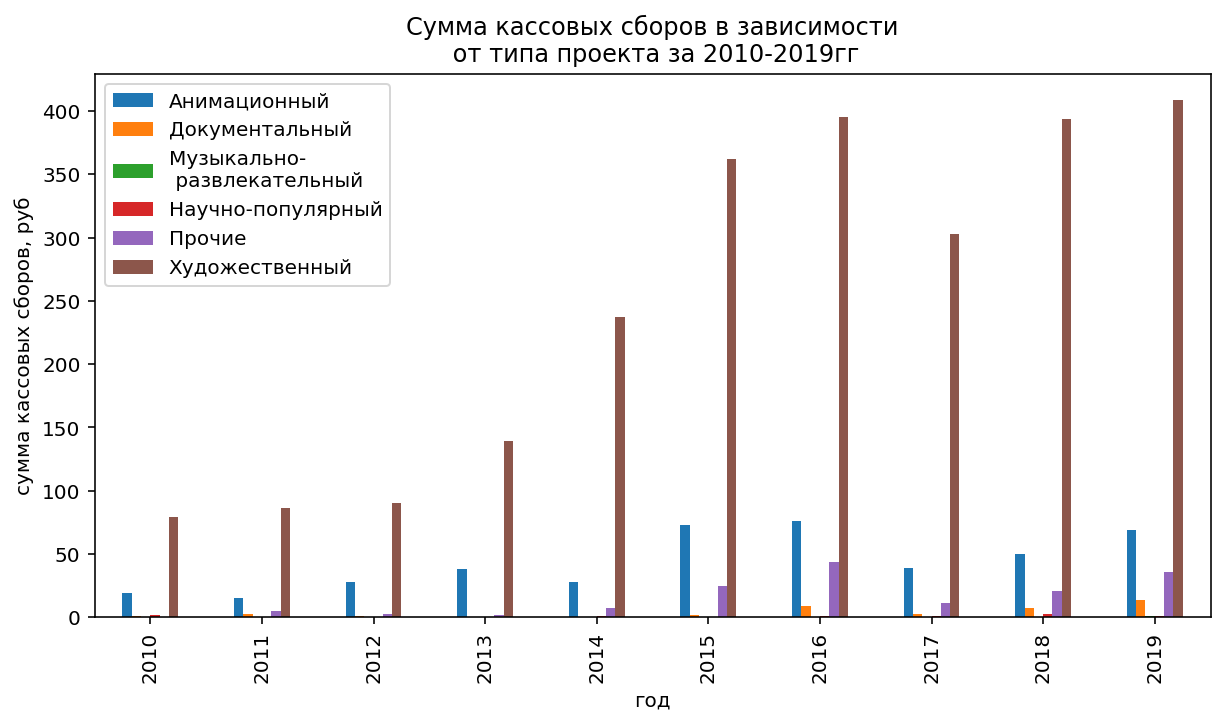

In [96]:
typs_table.plot.bar(figsize=(10, 5))
plt.xlabel('год')
plt.ylabel('сумма кассовых сборов, руб')
plt.title('Сумма кассовых сборов в зависимости\n от типа проекта за 2010-2019гг')
plt.legend(['Анимационный', 'Документальный', 'Музыкально-\n развлекательный', 'Научно-популярный', 'Прочие', 'Художественный'])
plt.show()

<font color="grey">Количество выпускаемого развлекательного контента несравнимо выше образовательного, однако стоит отметить наличие разных типов на протяжении всего исследуемого периода. Софинансирование обоими фондами отмечено преимущественно в популярных типах проектов - анимационных и художетсвенных фильмах.</font>

<div style="border:solid grey 1px; padding: 20px">
    Государственная поддержка кинематографа очень важна для развития отрасли в целом. Софинансирование кинопроектов позволяет дебютировать молодым специалистам, стимулирует развитие технологий и оказывает влияние на культурное развитие общества. В России этим занимаются два фонда: Фонд Кино и Министерство культуры. Фонд Кино как правило выбирает проекты, кассово выгодные и потенциально максимально популярные. Это подтверждается сравнением данных рапределения сумм общего бюджета, гос.поддержки и кассовых сборов. Министерсво культуры больше уделяет внимания дебютным, авторским и документальным проектам. Кассовые сборы этого фонда как правило не превышают бюджета проекта. Однако ввиду преследования иных целей, которые направлены на культурно-массовую просветительскую деятельность, оценка таких произведений идёт не по финансовым характеристикам, а по количеству пришедших зрителей.
    В ходе анализа установлено, что оба фонда софинансируют большинсиво современных художетсвенных и анимационных пректов, ориентированных на детей старше 6 лет и взрослых. Это самый распространённый и наиболее кассовый сегмент за исследуемый период. 

### Общий вывод

<div style="border:solid grey 1px; padding: 20px">
    В современном мире глобальных информационных процессов актуальным для человечества становится существование медиапространства, пронизывающего все сферы жизни людей. Одну из позиций в медиапространстве занимет кинематограф, ставший за многие годы отдельной отраслью народного хозяйства общества. Для государства эта отрасль интересна с точки зрения сохранения культурных наследий и традиций, их продвижения и культурного обогощения общества.
    Ежегодно на экраны российских кинотеатров выходит порядка 520 кинофильмов, причем в последние годы количество фильмов увеличивается. По данным Европейской аудиовизуальной обсерватории, Россия занимает лидирующие места в Европе по кинопосещаемости и кассовым сборам. Традиционно кинопрокатный год в России начинается 1 декабря и завершается 30 ноября. Такая система сложилась в 1997 году и на данный момент есть несколько источников статистики, отслеживающих данные проката. В то же время все имеющиеся источники информации о кассовых сборах в России имеют высокую погрешность по ряду причин: данные собираются исключительно со слов дистрибьюторов, что дает возможность искажения этой информации в ту или иную сторону, дистрибьюторы, в свою очередь, получают статистику сборов и посещаемости от кинотеатров также зачастую без подтверждения данных электронными автоматическими системами контроля, данные собираются и обнародуются по фильмам, а не по датам, что не дает возможности точной записи результатов проката того или иного фильма по календарным срокам, дистрибьюторы не разбивают свои сборы по городам и регионам России и не выделяют отдельно данные по странам.
    Это во моногом объясняет отсутсвие и искажение данных в базе министерства культуры, которые были взяты для проведения исследования.

Целью исследования ставилось изучение данных рынка проката российских кинотеатров и выявление трендов среди нескольких характеристик кинопроектов.

В первоначальном виде имелось две таблицы: с данными открытого портала Министерства культуры, подкреплённые данными сайта КиноПоиск и информация о кассовых сборах при прокате кинолент в российских кинотеатрах.
Для удобства работы и проведения анализа данные двух таблиц были объединены по общей характеристике - номеру прокатного удостоверения. Предварительный анализ сведений о таблицах обнаружил необходимость перевода типа данных из строчного в числовой в обеих таблицах. Для этого пришлось исключить мешающие данные, которые оказались неявным дубликатом. 
Все сведения о суммах проката в российских кинотеатрах попали в таблицу сведений о характеристиках фильмов.

На этапе предварительной обработки было проведено изменение типов некоторых данных: 
- данные столбца с датой премьеры фильма из неудобного для работы типа был переведён в дата-тип, столбец с рейтингом на КиноПоиске стал числовым, а столбцы с информацией о размере государственной поддержки следует на менее ёмкими для ускорения процесса обработки;
- на этапе работы с пропусками было решено не заполнять данные в столбцах о продюссировании, государственном финансировании и рейтингах, так как они многочисленны и не могут быть логически заменены без сторонней информации. Удаление их так же не целесообразно, так как ведёт к большому сокращению массы исследуемых данных. Пропуски страны-производителя были единичны и заполнены по сведениям Министерства культуры, а информацию с пропущенными сведениями о режиссёре было решено удалить в ввиду малого количества. Категорийные пропуски столбца с информацией о жанре проекта могли мешать дальнейшей обработке и были заменены общим понятием "не указано".Столбец с информацией о размере кассовых сборов был создан слиянием двух таблиц по по номеру прокатного удостоверения. Присоединяемых седений о прокате изначально было меньше, поэтому образовавшиеся пропуски логичны и оставлены без изменения. Общие потери к концу этого этапа составляют 0,13% от первоначального количества информации;
- на этапе подробного рассмотрения данных на наличие дублирующейся информации, были выявлены ошибки записи и скрытые дубликаты преимущественно в категорийных данных. Однако удаление скрытых дубликатов решено не проводить, так как их появление не вызвано техническими ошибками переноса информации и связано скорее с реорганизацией проката фильма, нежели с заненсением в базу сведений о нём. Ошибочные варианты идентичных записей были перезаписаны в более удобном для обработке виде: устранены начальные и конечные пробелы, заменены мешающие символы. Единичная потерянная информация о стране-производителе была заполнена из данных открытого портала Министерства культуры;
- при рассмотрении числовых данных обнаружилось несколько столбцов с большим количеством выпадающих значений. Визуализация распределения числовых данных позволила обнаружить подозрительные значения: отдельные точки на графиках, единичные отстоящие от общей массы пики и длинная ось х характеризуют наличие единичных выпадающих значений почти во всех столбцах. Однако, в имеющихся данных было решено заменить отсутствующими значениями только нулевые позиции бюджетов. Экстреммумы в характеристиках общего бюджета, суммах выделенного софинансирования и величинами прокатных средств было решено не трогать, так как они либо оправданы, либо не имеют логической замены, а их потеря может быть критичной. Удаление такой доли информации может негативно сказаться на оценке госфинансирования, так как количество проектов с господдержкой мало изначально. Эти критические значения решено оставить и проводить анализ с учётом возможных выпадов и при необходимости отсечь в конечных выводах характеристики или периоды их наибольшего влияния;
- для удобства анализа изменений характеристик по годам был создан столбец с годом выхода ленты в прокат, выделенный из даты премьеры фильма. Это позволит оценить изменение вкусов зрителей и влияние на отрасль внешних факторов (этономических, политических и социальных). Для быстрого анализа создателей проекта и распределению финансовых характеристик по жанрам первые значения из списка режиссёров и жанров соответственно были выделены в отдельные столбцы. Это позволит снизить количество вариантов одной и той же характеристики для удобной группировки. Так же в отдельный столбей была записана доля государственного финансирования в общем бюджете проекта. Она поможет оценить изменение вклада государственной поддержки на протяжении изучаемого периода.

Анализ прокатных данных проводился в основном по финансовым характеристикам: величина бюджета, величина софинансирования, величина кассвых сборов проката. Эти характеристики были исследованы по годам, с учётом влияния других характеристик проката: возрастного ограничения аудитории проекта, фондов финансирования, типов произведения.

На начало анализируемого периода приходится получение новых прокатных удостоверений для ранее выпущенных фильмов и заполнение базы данных порталом Министерства культуры, откуда и были взяты сведения для исследования. Мягкий подъем количества сведений о прокате говорит о росте объёма предложений и развитии отрасли. Причиной падения количества фильмов и сборов в 2017 году могло быть резкое падение спроса на просмотр кино в кинотеатре, вызванное пересыщением рынка, несколькими крупными провалами премьер, а так же скачком развития конкурентного телевизионного и интернет-проката, последовавшего за несколькими крупными и успешными премьерами сериалов. Дальнейший скромный, но уверенный рост говорит о стабилизации ситуации с выпуском фильмов в кинотеатры. Таким образом можно сказать, что период с 2015 года полнее представлен данными о прокате, нежели более ранние годы, когда медленнее происходило заполнение баз данных взятых для исследования порталов. Наибольшее число фильмов в прокате замечено в 2016 и 2019 годах. Это отразилось и на кассовых сборах: с 2016 года их величина резко выросла. Несмотря на меньшее количество предложений в 2017 году кассове сборы в этот период не упали, что характерно для проката успешных лент, понравившихся зрителям. Это подтверждается пиковыми значениями средних показателей за год: наличие малого количества проектов с большими кассовыми сборами сместило медианное и среднее арифметическое этого параметра к максимуму за исследуемый период. Падение средних значений в последующие годы при сохранении уровня общего дохода от проката и росте количества предложений говорит о выходе менее успешных лент в этот период. Изучение влияния предпочтений зрителей проводилось на основе зависимостей величины кассовых сборов от возрастного ценза проектов в течение всего исследуемого периода. В ходе анализа было выявлено, что наиболее многочислены и популярны оказывались проекты для детей и подростков. В то время как фильмы для взрослой аудитории хоть и имели большее количество предложений, зачастую имели меньший успех. Это может быть связано с социальными факторами: с ребёнком чаще всего присутствует сопровождение, а развлекательный контент подходит широкой аудитории. Также замечено, что проекты, предназанченные для всех возрасных категорий являются наменее многочислены и приносят наименьшие суммы сборов.

Государственная поддержка кинематографа в России существует уже давно, но с новой силой она заработала с 2013 года и статистика ведётся с этого периода. Фонд Кино как правило финансирует коммерчески успешные проекты (или те проекты, которые имеют шансы на коммерческий успех), а
Министерство культуры – дебютное, экспериментальное, детское и документальное кино. В целом, можно сказать, что финанисироются социально значимые, патриотические и как правило, не очень дорогие проекты. 

 - На протяжении всего исследуемого периода доля государственной поддержки в допущенных к софинансированию проектах составляет от 40% до 60%. Наибольший вклад был внесён в проекты, выпущенные в 2016 году. 2014 и 2017 годы в виду ухудщения экономической ситуации имеют спады, однако за ними следует рост предложений софинансированных проектов. Кроме того ранее уже отмечено, что в 2017 году наблюдалось меньшее количество выпущенных в прокат филльмов, поэтому наблюдается снижение параметров госюподдержки. Так же можно заметить, что график общей суммы госсподдержки повторяет график общего бюджета, что подтверждается примерно равным процентом софинансирования по годам. Кассовые сборы на начальном этапе в общей массе не превосходили бюджетные затраты проектов, но ситуация изменилась в 2017 и 2018 году, когда они превысилиобщий бюжет. Спад объема кассовых сборов в 2019 году может быть вызван не полными сведениями в базе занных за год или малым интересом зрителей к проектам. Посмотрим, как отражаются на объёме кассовых сборов выбор фонда финансирования.
 
- Визуализировав данные, распределённые по фондам, можно отметить, что проекты для всех возрастных категориях занчительно меньше в списках обоих фондов поддержки, а совместных проектов с этой характеристикой нет совсем. Это объясняется не только малым общим чилслом выпускаемых фильмов этой категории, но их низкими кассовыми сборами среди прочих. Проекты для детей и подростков разных возрастов наиболее популярны для обоих фондов. Это может объясняться приоритетностью духовно-нравственного воспитания молодого покаления при рассмотрении заявок на финансирование. Проекты для взрослых охотнее финансируются министерством культуры, нежели фондом кино. Большее число проектов министерства культуры в категории "18+", нежели у фонда кино может быть связано с финанисрованием этого фонда дебютного, экспериментального и документального типа проектов.


- Количество выпускаемого развлекательного контента несравнимо выше образовательного, однако стоит отметить наличие разных типов на протяжении всего исследуемого периода. Софинансирование обоими фондами отмечено преимущественно в популярных типах проектов - анимационных и художетсвенных фильмах. Это объясняется возможностью влиять на культурное развитие общества с помощью наиболее выбираемого контента медиапространства.

- Фонд Кино отдаёт предпочтение проектам, кассово выгодным и потенциально максимально популярным. Это подтверждается сравнением данных рапределения сумм общего бюджета, гос.поддержки и кассовых сборов. Министерсво культуры больше уделяет внимания дебютным, авторским и документальным проектам. Кассовые сборы этого фонда как правило не превышают бюджета проекта. Однако ввиду преследования иных целей, которые направлены на культурно-массовую просветительскую деятельность, оценка таких произведений идёт не по финансовым характеристикам, а по количеству пришедших зрителей. В ходе анализа установлено, что оба фонда софинансируют большинсиво современных художетсвенных и анимационных пректов, ориентированных на детей старше 6 лет и взрослых. Это самый распространённый и наиболее кассовый сегмент за исследуемый период.

<div style="border:solid grey 1px; padding: 20px">
    Проведя исследование данных о прокате в российских кинотеатрах за 2010-2019 годы, было установлено, что наиболее популярными в стране являются ленты развлекательного характера - анимационные и художетсвенные фильмы. Софинансирование проектов этих категорий имею наибольшие шансы на успех как финансовый, так и в сохранения культурных наследий и традиций, их продвижения и культурного обогощения общества.